In [1]:
'''
This is a copy from what we submitted to Bonnie

Remove FSC loss (i.e set beta to 0)

'''

'\nThis is a copy from what we submitted to Bonnie\n\nRemove FSC loss (i.e set beta to 0)\n\n'

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### remake a prediction
import torch
import numpy as np
from torch.utils.data import Dataset
import h5py
from utils.cryodataset import CryoDataNew

# Usage example
dataset = CryoDataNew('./data/20240512_cryo_data_with_scales_and_chains.h5')
# Assuming you have a CryoData instance called 'dataset'
for i in range(2):  # Check the first two samples
    sample = dataset[i]
    print(f"Sample {sample['name']}:")
    print(f"homolog_ca shape: {sample['homolog_ca'].shape}")
    print(f"true_vol shape: {sample['true_vol'].shape}")
    print(f"true_ca shape: {sample['true_ca'].shape}")
    print(f"true_chain_voxel sum:  {sample['chain_voxel_mask'].sum()} ({sample['chain_voxel_mask'].sum() / (64 ** 3) * 100: .2f}%)")
    print(f"homolog_ca stats: min={sample['homolog_ca'].min()}, max={sample['homolog_ca'].max()}")
    print(f"true_vol stats: min={sample['true_vol'].min()}, max={sample['true_vol'].max()}")
    print(f"true_ca stats: min={sample['true_ca'].min()}, max={sample['true_ca'].max()}")
    print()


Sample 2Y9J:
homolog_ca shape: torch.Size([64, 64, 64])
true_vol shape: torch.Size([64, 64, 64])
true_ca shape: torch.Size([64, 64, 64])
true_chain_voxel sum:  21420.0 ( 8.17%)
homolog_ca stats: min=0.0, max=1.0
true_vol stats: min=0.0, max=1.0
true_ca stats: min=0.0, max=1.0

Sample 2YEW:
homolog_ca shape: torch.Size([64, 64, 64])
true_vol shape: torch.Size([64, 64, 64])
true_ca shape: torch.Size([64, 64, 64])
true_chain_voxel sum:  10488.0 ( 4.00%)
homolog_ca stats: min=0.0, max=1.0
true_vol stats: min=0.0, max=1.0
true_ca stats: min=0.0, max=1.0



Batch homolog_ca shape: torch.Size([1, 64, 64, 64])
Batch true_vol shape: torch.Size([1, 64, 64, 64])
Batch true_ca shape: torch.Size([1, 64, 64, 64])
----------------------------------------------
Number of training cases: 230
Number of test cases: 26
---------------------------------
Training Data:
Avg FSC Loss (1-FSC): 0.6929
Min/Max FSC Loss: 0.0078, 0.9472
Avg RMSD: 0.0283
Min/Max RMSD: 0.0000, 0.1000
---------------------------------
Test Data
Avg FSC Loss (1-FSC): 0.6967
Min/Max FSC Loss: 0.0654, 0.9295
Avg RMSD: 0.0267
Min/Max RMSD: 0.0000, 0.0749


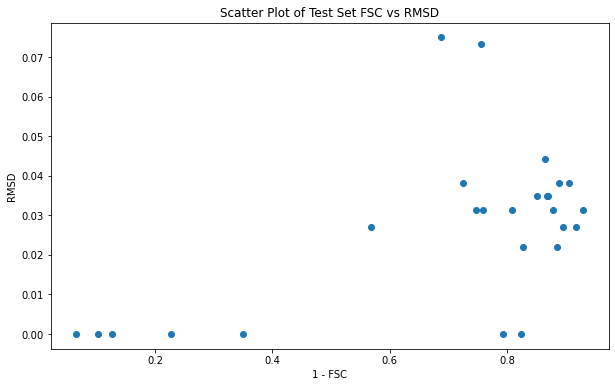

In [3]:
import torch
from torch.utils.data import DataLoader, random_split
from utils.loss_utils import check_distributions
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
torch.manual_seed(42)

dataset_size = len(dataset)
train_size = int(0.9 * dataset_size)  # 90% for training
test_size = dataset_size - train_size  # 10% for testing

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Data loaders for both train and test sets
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

for batch in train_loader:
    print(f"Batch homolog_ca shape: {batch['homolog_ca'].shape}")
    print(f"Batch true_vol shape: {batch['true_vol'].shape}")
    print(f"Batch true_ca shape: {batch['true_ca'].shape}")
    break;

train_fsc, train_rmsd, test_fsc, test_rmsd = check_distributions(train_loader, test_loader)
    
print('----------------------------------------------')
print(f'Number of training cases: {len(train_fsc)}')
print(f'Number of test cases: {len(test_fsc)}')
print('---------------------------------')
print('Training Data:')
print(f'Avg FSC Loss (1-FSC): {np.array(train_fsc).mean():.4f}')
print(f'Min/Max FSC Loss: {np.array(train_fsc).min():.4f}, {np.array(train_fsc).max():.4f}')
print(f'Avg RMSD: {np.array(train_rmsd).mean():.4f}')
print(f'Min/Max RMSD: {np.array(train_rmsd).min():.4f}, {np.array(train_rmsd).max():.4f}')
print('---------------------------------')
print('Test Data')
print(f'Avg FSC Loss (1-FSC): {np.array(test_fsc).mean():.4f}')
print(f'Min/Max FSC Loss: {np.array(test_fsc).min():.4f}, {np.array(test_fsc).max():.4f}')
print(f'Avg RMSD: {np.array(test_rmsd).mean():.4f}')
print(f'Min/Max RMSD: {np.array(test_rmsd).min():.4f}, {np.array(test_rmsd).max():.4f}')

'''
# Create a histogram for FSC and RMSD
plt.figure(figsize=(10, 6))
plt.hist(test_fsc, bins=26, alpha=0.7)
plt.title('Histogram of Test Set FSC')
plt.xlabel('1 - FSC')  
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(test_rmsd, bins=26, alpha=0.7)
plt.title('Histogram of Test Set RMSD') 
plt.xlabel('RMSD')  
plt.ylabel('Frequency') 
plt.show()
'''

plt.figure(figsize=(10, 6))
plt.scatter(test_fsc, test_rmsd)
plt.title('Scatter Plot of Test Set FSC vs RMSD') 
plt.xlabel('1 - FSC')  
plt.ylabel('RMSD') 
plt.show()

In [5]:
!nvidia-smi

Mon May 20 14:31:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A10                     On  | 00000000:07:00.0 Off |                    0 |
|  0%   41C    P0              57W / 150W |   4348MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
# Load model from unet_model.py
from unet_model import UNet
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

model = UNet().to(device)

Using device: cuda


In [7]:
from torchsummary import summary

# Print the model summary
summary(model, (2, 64, 64, 64))  

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 64, 64, 64]           3,520
              ReLU-2       [-1, 64, 64, 64, 64]               0
       BatchNorm3d-3       [-1, 64, 64, 64, 64]             128
            Conv3d-4       [-1, 64, 64, 64, 64]         110,656
              ReLU-5       [-1, 64, 64, 64, 64]               0
       BatchNorm3d-6       [-1, 64, 64, 64, 64]             128
            Conv3d-7      [-1, 128, 32, 32, 32]         221,312
              ReLU-8      [-1, 128, 32, 32, 32]               0
       BatchNorm3d-9      [-1, 128, 32, 32, 32]             256
           Conv3d-10      [-1, 128, 32, 32, 32]         442,496
             ReLU-11      [-1, 128, 32, 32, 32]               0
      BatchNorm3d-12      [-1, 128, 32, 32, 32]             256
           Conv3d-13      [-1, 256, 16, 16, 16]         884,992
             ReLU-14      [-1, 256, 16,

In [8]:
# Import the loss functions from loss_utils.py
from utils.loss_utils import fsc_loss_function, rmse_loss_function
import torch

def combined_loss_function(prediction, target, num_shells, alpha=1, beta=1, gamma=1):
    fsc_loss = fsc_loss_function(prediction, target, num_shells)
    rmse_loss = rmse_loss_function(prediction, target)
    total_loss = alpha * fsc_loss + beta * rmse_loss 
    return total_loss, fsc_loss, rmse_loss

In [9]:
### Keep optimizer and list of losses outside of the train cell to continue 
###                  training by re-running cell

num_epochs = 25
print(f"Number of Epochs to Run: {num_epochs}")

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

fsc_loss_train_values = []
rmse_loss_train_values = []
combined_loss_values = []

fsc_loss_values = {"subset_chain": dict(), 
                   "box_chain": dict(),
                   "box_non_chain": dict()
                  }
# will append by pdb seen. 

Number of Epochs to Run: 25


In [10]:
def calculate_subset_fsc_losses(homolog_ca_predictions, true_ca, voxel_mask, shells):
    

    chain_64_fsc_box_loss = fsc_loss_function(homolog_ca_predictions * voxel_mask, 
                                              true_ca * voxel_mask, shells)
    
    non_chain_64_fsc_box_loss = fsc_loss_function(homolog_ca_predictions * (1 - voxel_mask),
                                          true_ca * (1 - voxel_mask), shells)

    
    h_masked, t_masked = homolog_ca_predictions * voxel_mask, true_ca * voxel_mask
    mask_idx = torch.nonzero(voxel_mask, as_tuple=False)
    min_mask, max_mask = mask_idx.min(axis=0)[0], mask_idx.max(axis=0)[0]
    h_masked_resized = h_masked[min_mask[0]:max_mask[0]+1,
                                  min_mask[1]:max_mask[1]+1,
                                  min_mask[2]:max_mask[2]+1]
    t_masked_resized = t_masked[min_mask[0]:max_mask[0]+1,
                                  min_mask[1]:max_mask[1]+1,
                                  min_mask[2]:max_mask[2]+1]

    chain_fsc_subset_loss = fsc_loss_function(h_masked_resized, t_masked_resized, shells)
    del h_masked, h_masked_resized, t_masked, t_masked_resized, mask_idx
    # free up memory
    
    return chain_fsc_subset_loss.item(), chain_64_fsc_box_loss.item(), non_chain_64_fsc_box_loss.item()


def update_fsc_loss_dict(chain_fsc_subset_loss, chain_64_fsc_box_loss, non_chain_64_fsc_box_loss, pdb, fsc_loss_values = fsc_loss_values):
    if pdb not in fsc_loss_values["subset_chain"]:
        fsc_loss_values["subset_chain"][pdb] = []
        fsc_loss_values["box_chain"][pdb] = []
        fsc_loss_values["box_non_chain"][pdb] = []
        
    fsc_loss_values["subset_chain"][pdb].append(chain_fsc_subset_loss)
    fsc_loss_values["box_chain"][pdb].append(chain_64_fsc_box_loss)
    fsc_loss_values["box_non_chain"][pdb].append(non_chain_64_fsc_box_loss)
    # should be in place?

In [11]:
import numpy as np
import torch
from tqdm import tqdm  

checkpoint_file_name = '20240514_checkpoint_20shells_25epochs_WO-rmse.pth' # change

# Training loop
shells=20
for epoch in range(num_epochs):
    model.train()
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}") as pbar:
        for i, batch in enumerate(train_loader):
            homolog_ca = batch['homolog_ca'].to(device)
            true_vol = batch['true_vol'].to(device)
            true_ca = batch['true_ca'].to(device)
            voxel_mask = batch["chain_voxel_mask"].to(device)
            name=batch["name"][0]
            
            
            # Stack the arrays along a new dimension to create a tensor of shape 2x64x64x64
            inputs = torch.stack((homolog_ca, true_vol), dim=1)
            
            optimizer.zero_grad()
            outputs = model(inputs)
    
            # Compute the predictions corresponding to the homolog_ca array
            homolog_ca_predictions = outputs[:, :1, :, :, :]
            assert homolog_ca_predictions.squeeze().shape == (64,64,64), "Batch included, may cause loss issue"
            assert true_ca.squeeze().shape == (64,64,64), "Batch included, may cause loss issue"
            
            #combined_loss, fsc_loss_value, rmse_loss = combined_loss_function(homolog_ca_predictions, true_ca.unsqueeze(1), shells)
            #print("before", rmse_loss.item())
            

            # FIX 05/13/24
            homolog_ca_predictions = homolog_ca_predictions.squeeze()
            true_ca = true_ca.squeeze()
            voxel_mask = voxel_mask.squeeze()
            combined_loss, fsc_loss_value, rmse_loss = combined_loss_function(homolog_ca_predictions.squeeze(), 
                                                                              true_ca.squeeze(), shells, beta=0)
            
            combined_loss.backward()
            optimizer.step()

            fsc_loss_train_values.append(fsc_loss_value.item())
            rmse_loss_train_values.append(rmse_loss.item())
            combined_loss_values.append(combined_loss.item())

            # Update the progress bar
            pbar.set_postfix({'loss': combined_loss.item()})
            pbar.update(1)
                
        # Log for each epoch
        print(f"Finished Epoch #{epoch+1}")
        print(f"Average FSC Loss: {np.array(fsc_loss_train_values).mean():.4f}")
        print(f"Average RMSE: {np.array(rmse_loss_train_values).mean():.4f}")
        print(f"Combined Loss: {np.array(combined_loss_values).mean():.4f}")
    
        # Save training data
        torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': combined_loss,
        }, checkpoint_file_name)
        

Epoch 1/25: 100%|██████████| 230/230 [01:44<00:00,  2.23it/s, loss=0.761] 

Finished Epoch #1
Average FSC Loss: 0.6606
Average RMSE: 0.5417
Combined Loss: 0.6606


Epoch 2/25: 100%|██████████| 230/230 [01:43<00:00,  2.21it/s, loss=0.502] 

Finished Epoch #2
Average FSC Loss: 0.6392
Average RMSE: 0.5462
Combined Loss: 0.6392


Epoch 3/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.644] 

Finished Epoch #3
Average FSC Loss: 0.6262
Average RMSE: 0.5502
Combined Loss: 0.6262


Epoch 4/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.647] 

Finished Epoch #4
Average FSC Loss: 0.6167
Average RMSE: 0.5538
Combined Loss: 0.6167


Epoch 5/25: 100%|██████████| 230/230 [01:44<00:00,  2.19it/s, loss=0.572] 

Finished Epoch #5
Average FSC Loss: 0.6089
Average RMSE: 0.5576
Combined Loss: 0.6089


Epoch 6/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.619]

Finished Epoch #6
Average FSC Loss: 0.6023
Average RMSE: 0.5620
Combined Loss: 0.6023


Epoch 7/25: 100%|██████████| 230/230 [01:44<00:00,  2.19it/s, loss=0.692] 

Finished Epoch #7
Average FSC Loss: 0.5959
Average RMSE: 0.5668
Combined Loss: 0.5959


Epoch 8/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.667]

Finished Epoch #8
Average FSC Loss: 0.5908
Average RMSE: 0.5718
Combined Loss: 0.5908


Epoch 9/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.216] 

Finished Epoch #9
Average FSC Loss: 0.5856
Average RMSE: 0.5769
Combined Loss: 0.5856


Epoch 10/25: 100%|██████████| 230/230 [01:45<00:00,  2.19it/s, loss=0.535] 

Finished Epoch #10
Average FSC Loss: 0.5809
Average RMSE: 0.5823
Combined Loss: 0.5809


Epoch 11/25: 100%|██████████| 230/230 [01:44<00:00,  2.18it/s, loss=0.688] 

Finished Epoch #11
Average FSC Loss: 0.5760
Average RMSE: 0.5880
Combined Loss: 0.5760


Epoch 12/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.624] 

Finished Epoch #12
Average FSC Loss: 0.5714
Average RMSE: 0.5938
Combined Loss: 0.5714


Epoch 13/25: 100%|██████████| 230/230 [01:44<00:00,  2.18it/s, loss=0.614] 

Finished Epoch #13
Average FSC Loss: 0.5669
Average RMSE: 0.5997
Combined Loss: 0.5669


Epoch 14/25: 100%|██████████| 230/230 [01:45<00:00,  2.20it/s, loss=0.184] 

Finished Epoch #14
Average FSC Loss: 0.5624
Average RMSE: 0.6058
Combined Loss: 0.5624


Epoch 15/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.621] 

Finished Epoch #15
Average FSC Loss: 0.5587
Average RMSE: 0.6118
Combined Loss: 0.5587


Epoch 16/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.0794]

Finished Epoch #16
Average FSC Loss: 0.5543
Average RMSE: 0.6177
Combined Loss: 0.5543


Epoch 17/25: 100%|██████████| 230/230 [01:44<00:00,  2.19it/s, loss=0.289] 

Finished Epoch #17
Average FSC Loss: 0.5499
Average RMSE: 0.6238
Combined Loss: 0.5499


Epoch 18/25: 100%|██████████| 230/230 [01:44<00:00,  2.21it/s, loss=0.591] 

Finished Epoch #18
Average FSC Loss: 0.5451
Average RMSE: 0.6297
Combined Loss: 0.5451


Epoch 19/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.572] 

Finished Epoch #19
Average FSC Loss: 0.5409
Average RMSE: 0.6357
Combined Loss: 0.5409


Epoch 20/25: 100%|██████████| 230/230 [01:43<00:00,  2.21it/s, loss=0.367] 

Finished Epoch #20
Average FSC Loss: 0.5375
Average RMSE: 0.6414
Combined Loss: 0.5375


Epoch 21/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.266] 

Finished Epoch #21
Average FSC Loss: 0.5324
Average RMSE: 0.6473
Combined Loss: 0.5324


Epoch 22/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.324] 

Finished Epoch #22
Average FSC Loss: 0.5275
Average RMSE: 0.6532
Combined Loss: 0.5275


Epoch 23/25: 100%|██████████| 230/230 [01:44<00:00,  2.19it/s, loss=0.0682]

Finished Epoch #23
Average FSC Loss: 0.5227
Average RMSE: 0.6590
Combined Loss: 0.5227


Epoch 24/25: 100%|██████████| 230/230 [01:44<00:00,  2.22it/s, loss=0.494] 

Finished Epoch #24
Average FSC Loss: 0.5178
Average RMSE: 0.6649
Combined Loss: 0.5178


Epoch 25/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.601] 

Finished Epoch #25
Average FSC Loss: 0.5129
Average RMSE: 0.6706
Combined Loss: 0.5129


Epoch 25/25: 100%|██████████| 230/230 [01:44<00:00,  2.20it/s, loss=0.601]


In [8]:
# just for comparison, this was the OG run we did in this notebook!

Epoch 1/25: 100%|██████████| 230/230 [01:28<00:00,  2.60it/s, loss=0.129] 

Finished Epoch #1
Average FSC: 0.7908
Average RMSE: 0.2011
Combined Loss: 0.9919


Epoch 2/25: 100%|██████████| 230/230 [01:29<00:00,  2.56it/s, loss=0.984]

Finished Epoch #2
Average FSC: 0.7658
Average RMSE: 0.1492
Combined Loss: 0.9150


Epoch 3/25: 100%|██████████| 230/230 [01:29<00:00,  2.56it/s, loss=0.205]

Finished Epoch #3
Average FSC: 0.7521
Average RMSE: 0.1303
Combined Loss: 0.8824


Epoch 4/25: 100%|██████████| 230/230 [01:30<00:00,  2.54it/s, loss=0.327] 

Finished Epoch #4
Average FSC: 0.7415
Average RMSE: 0.1194
Combined Loss: 0.8609


Epoch 5/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.926]

Finished Epoch #5
Average FSC: 0.7334
Average RMSE: 0.1124
Combined Loss: 0.8457


Epoch 6/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.933] 

Finished Epoch #6
Average FSC: 0.7269
Average RMSE: 0.1074
Combined Loss: 0.8343


Epoch 7/25: 100%|██████████| 230/230 [01:30<00:00,  2.54it/s, loss=1.01]  

Finished Epoch #7
Average FSC: 0.7205
Average RMSE: 0.1036
Combined Loss: 0.8241


Epoch 8/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.904] 

Finished Epoch #8
Average FSC: 0.7159
Average RMSE: 0.1009
Combined Loss: 0.8168


Epoch 9/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.758] 

Finished Epoch #9
Average FSC: 0.7103
Average RMSE: 0.0984
Combined Loss: 0.8087


Epoch 10/25: 100%|██████████| 230/230 [01:30<00:00,  2.54it/s, loss=0.9]   

Finished Epoch #10
Average FSC: 0.7051
Average RMSE: 0.0964
Combined Loss: 0.8016


Epoch 11/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.945] 

Finished Epoch #11
Average FSC: 0.7006
Average RMSE: 0.0948
Combined Loss: 0.7955


Epoch 12/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.77]  

Finished Epoch #12
Average FSC: 0.6952
Average RMSE: 0.0933
Combined Loss: 0.7885


Epoch 13/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.923] 

Finished Epoch #13
Average FSC: 0.6903
Average RMSE: 0.0920
Combined Loss: 0.7824


Epoch 14/25: 100%|██████████| 230/230 [01:30<00:00,  2.52it/s, loss=0.511] 

Finished Epoch #14
Average FSC: 0.6854
Average RMSE: 0.0909
Combined Loss: 0.7763


Epoch 15/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.66]  

Finished Epoch #15
Average FSC: 0.6811
Average RMSE: 0.0899
Combined Loss: 0.7710


Epoch 16/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.949] 

Finished Epoch #16
Average FSC: 0.6765
Average RMSE: 0.0890
Combined Loss: 0.7655


Epoch 17/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.829] 

Finished Epoch #17
Average FSC: 0.6724
Average RMSE: 0.0882
Combined Loss: 0.7606


Epoch 18/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.105] 

Finished Epoch #18
Average FSC: 0.6685
Average RMSE: 0.0875
Combined Loss: 0.7559


Epoch 19/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.797] 

Finished Epoch #19
Average FSC: 0.6642
Average RMSE: 0.0867
Combined Loss: 0.7509


Epoch 20/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.76]  

Finished Epoch #20
Average FSC: 0.6603
Average RMSE: 0.0861
Combined Loss: 0.7464


Epoch 21/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.497] 

Finished Epoch #21
Average FSC: 0.6559
Average RMSE: 0.0855
Combined Loss: 0.7414


Epoch 22/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.794] 

Finished Epoch #22
Average FSC: 0.6515
Average RMSE: 0.0850
Combined Loss: 0.7364


Epoch 23/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.538] 

Finished Epoch #23
Average FSC: 0.6471
Average RMSE: 0.0844
Combined Loss: 0.7315


Epoch 24/25: 100%|██████████| 230/230 [01:30<00:00,  2.55it/s, loss=0.0883]

Finished Epoch #24
Average FSC: 0.6436
Average RMSE: 0.0839
Combined Loss: 0.7276


Epoch 25/25: 100%|██████████| 230/230 [01:30<00:00,  2.54it/s, loss=0.126] 

Finished Epoch #25
Average FSC: 0.6402
Average RMSE: 0.0835
Combined Loss: 0.7237


Epoch 25/25: 100%|██████████| 230/230 [01:30<00:00,  2.54it/s, loss=0.126]


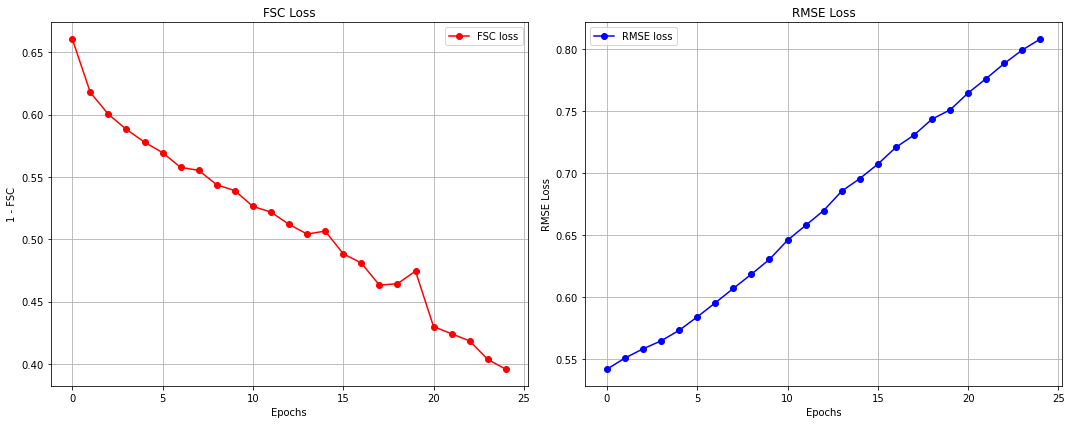

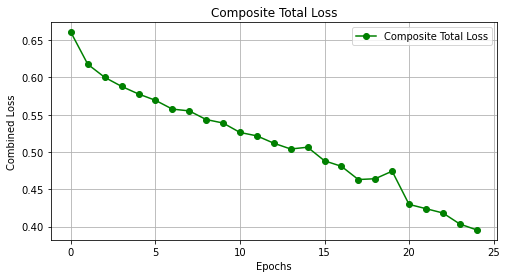

In [12]:
import matplotlib.pyplot as plt


def average_per_epoch(loss_array, batches_per_epoch):
    return np.array([np.mean(loss_array[i:i + batches_per_epoch]) for i in range(0, len(loss_array), batches_per_epoch)])

fsc_loss_avg = average_per_epoch(fsc_loss_train_values, 230)
rmse_loss_avg = average_per_epoch(rmse_loss_train_values, 230)
combo_loss_avg = average_per_epoch(combined_loss_values, 230)

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns of subplots
# Plotting FSC losses
ax[0].plot(fsc_loss_avg, label='FSC loss', marker='o', color='red')
ax[1].plot(rmse_loss_avg, label='RMSE loss', marker='o', color='blue')
ax[0].set_title('FSC Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('1 - FSC')
ax[0].legend()
ax[0].grid(True)
ax[1].set_title('RMSE Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('RMSE Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# Plotting Combined losses
plt.plot(combo_loss_avg, label='Composite Total Loss', color='green', marker='o')
plt.title('Composite Total Loss')
plt.xlabel('Epochs')
plt.ylabel('Combined Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### CODE TO RELOAD FROM CHECKPOINT ###
#checkpoint = torch.load('20240514_checkpoint_20shells_25epochs_rerun.pth')
#model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#start_epoch = checkpoint['epoch']
#loss = checkpoint['loss']


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import mrcfile
import torch
from utils.postprocess import  * 
from utils.prediction_utils import *
from Bio.PDB import PDBParser, PDBIO

%load_ext autoreload
%autoreload 2
    
# Set the model to evaluation mode
model.eval()

# Initialize lists to store inputs, ground truth, and predictions
inputs_list = []
predictions_list = []
ground_truth_list = []

fsc_values_test = []
fsc_values_before_test = []
rmse_values_test = []
rmse_values_before_test = []
names = []

# Iterate over the test data
with torch.no_grad():
    for i, batch in enumerate(test_loader):
        homolog_ca = batch['homolog_ca'].to(device)
        true_vol = batch['true_vol'].to(device)
        true_ca = batch['true_ca'].to(device)
        name = batch['name']


        before_fsc_loss_value = fsc_loss_function(homolog_ca.squeeze(), true_ca.squeeze())
        before_rmse_loss_value = rmse_loss_function(homolog_ca.squeeze(), true_ca.squeeze())
             
        inputs = torch.stack((homolog_ca, true_vol), dim=1)
        
        # Forward pass
        outputs = model(inputs)

        # Compute the predictions corresponding to the homolog_ca array
        homolog_ca_predictions = outputs[:, :1, :, :, :]

        if name[0] == '5N8Y':
            
            print('Start AllofIt')
            allofit = generate_pdb(name[0], homolog_ca_predictions.cpu(), sample["true_scale"])
            preds_binarized, true_coords_sorted, estim_coords_sorted, structure = allofit
            
            # Parse the PDB file
            parser = PDBParser()
            structure = parser.get_structure("pdb", "../data/backbones/" + name[0] + "_backbone.pdb")
            
            # Filter out N and O atoms and replace CA coordinates
            for model in structure:
                for chain in model:
                    for i, residue in enumerate(chain):
                        for atom in residue.get_atoms():
                            if atom.get_name() in ['N', 'O', 'C']:
                                residue.detach_child(atom.get_id())
                            elif atom.get_name() == 'CA':
                                atom.set_coord(estim_coords_sorted[i])
            
            # Write to a new PDB file
            io = PDBIO()
            io.set_structure(structure)
            io.save(f'./output/ca_pdb/{name[0]}_prediction.pdb')
            
        fsc_loss_value = fsc_loss_function(homolog_ca_predictions.squeeze(), true_ca.squeeze())
        rmse_loss_value = rmse_loss_function(homolog_ca_predictions.squeeze(), true_ca.squeeze())
        
        # Append inputs, ground truth, and predictions to the lists
        inputs_list.append(inputs.cpu().numpy())
        predictions_list.append(outputs.cpu().numpy())
        ground_truth_list.append(true_ca.cpu().numpy())
        
        fsc_values_test.append(fsc_loss_value.item())
        fsc_values_before_test.append(before_fsc_loss_value.item())
        rmse_values_test.append(rmse_loss_value.item())
        rmse_values_before_test.append(before_rmse_loss_value.item())
        names.append(name[0])
        
# Convert lists to NumPy arrays
inputs_array = np.concatenate(inputs_list, axis=0)
predictions_array = np.concatenate(predictions_list, axis=0)
ground_truth_array = np.concatenate(ground_truth_list, axis=0)

print(f'Avg FSC of Test set before the model: {(np.array(fsc_values_before_test).mean()-1)/-1:.4f}')
print(f'Avg FSC of Test set after model: {(np.array(fsc_values_test).mean()-1)/-1:.4f}')
print(f'Avg RMSE of Test set before the model: {(np.array(rmse_values_before_test).mean()-1)/-1:.4f}')
print(f'Avg RMSE of Test set after model: {(np.array(rmse_values_test).mean()-1)/-1:.4f}')


Avg FSC of Test set before the model: 0.3033
Avg FSC of Test set after model: 0.4605
Avg RMSE of Test set before the model: 0.8980
Avg RMSE of Test set after model: 0.1935


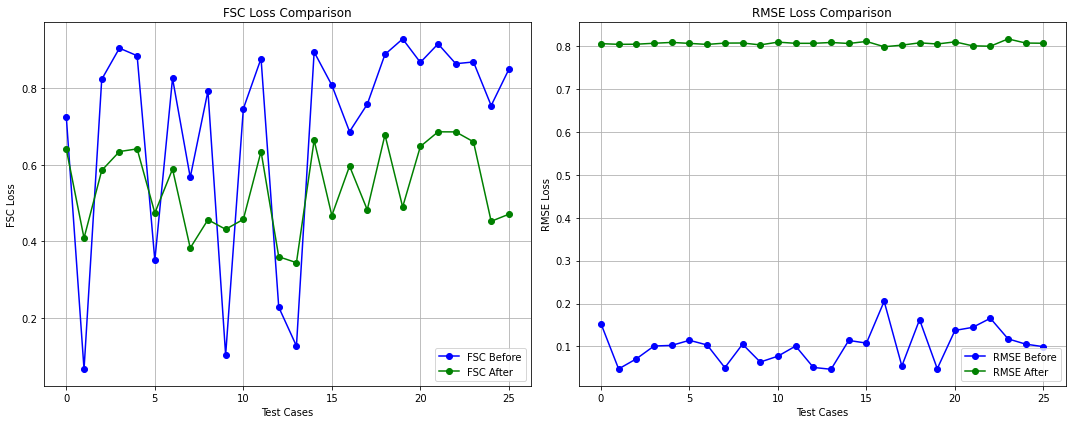

In [14]:
import matplotlib.pyplot as plt

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns of subplots

# Plotting FSC losses
ax[0].plot(fsc_values_before_test, label='FSC Before', marker='o', color='blue')
ax[0].plot(fsc_values_test, label='FSC After', marker='o', color='green')
ax[0].set_title('FSC Loss Comparison')
ax[0].set_xlabel('Test Cases')
ax[0].set_ylabel('FSC Loss')
ax[0].legend()
ax[0].grid(True)

# Plotting RMSD losses
ax[1].plot(rmse_values_before_test, label='RMSE Before', color='blue', marker='o')
ax[1].plot(rmse_values_test, label='RMSE After', color='green', marker='o')
ax[1].set_title('RMSE Loss Comparison')
ax[1].set_xlabel('Test Cases')
ax[1].set_ylabel('RMSE Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [22]:
np.where(np.array(fsc_values_before_test) - np.array(fsc_values_test) < 0)

(array([ 1,  5,  9, 12, 13]),)

In [23]:
names[1], names[5], names[9], names[12], names[13]

('5G5L', '7JPU', '3JC5', '6RGL', '7JTH')

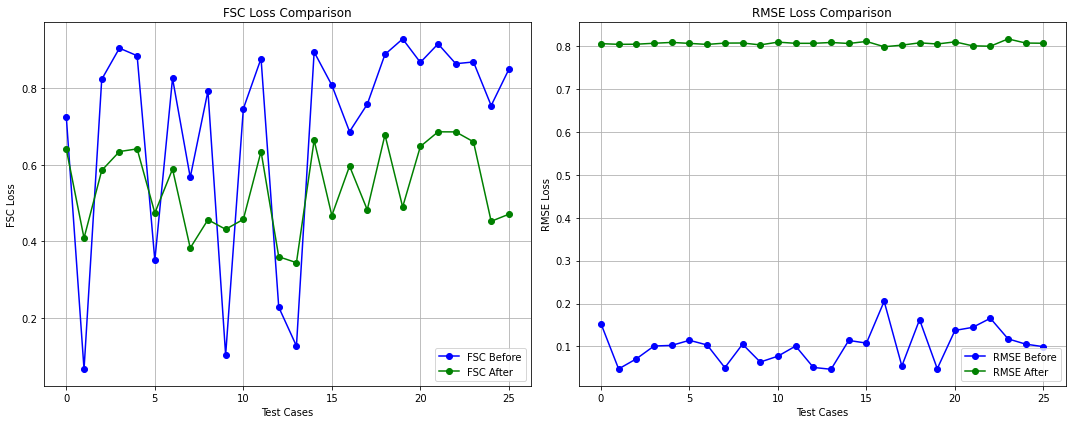

In [15]:
# OLD

import matplotlib.pyplot as plt

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns of subplots

# Plotting FSC losses
ax[0].plot(fsc_values_before_test, label='FSC Before', marker='o', color='blue')
ax[0].plot(fsc_values_test, label='FSC After', marker='o', color='green')
ax[0].set_title('FSC Loss Comparison')
ax[0].set_xlabel('Test Cases')
ax[0].set_ylabel('FSC Loss')
ax[0].legend()
ax[0].grid(True)

# Plotting RMSD losses
ax[1].plot(rmse_values_before_test, label='RMSE Before', color='blue', marker='o')
ax[1].plot(rmse_values_test, label='RMSE After', color='green', marker='o')
ax[1].set_title('RMSE Loss Comparison')
ax[1].set_xlabel('Test Cases')
ax[1].set_ylabel('RMSE Loss')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


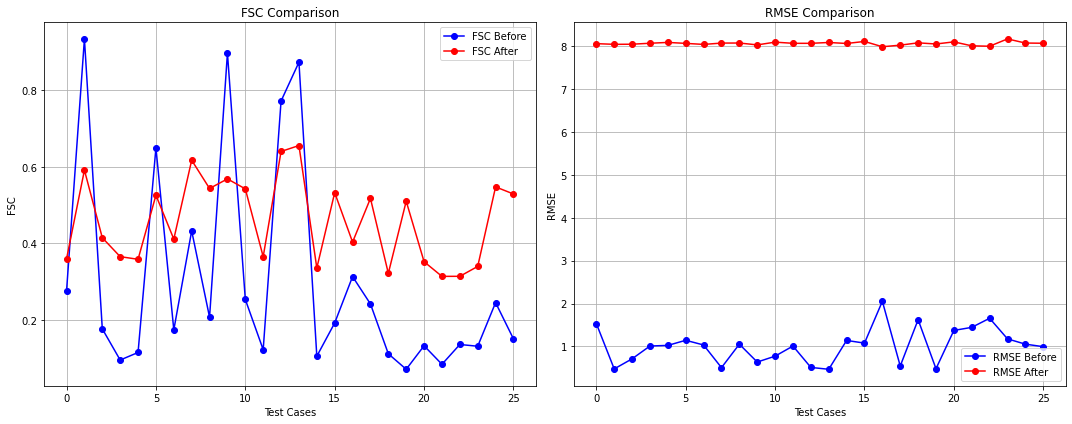

In [16]:
fsc_before_avg = [(value - 1) / -1 for value in fsc_values_before_test]
fsc_after_avg = [(value - 1) / -1 for value in fsc_values_test]
rmse_before_avg = [(value) / .1 for value in rmse_values_before_test]
rmse_after_avg = [(value) / .1 for value in rmse_values_test]

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns of subplots
# Plotting FSC losses
ax[0].plot(fsc_before_avg, label='FSC Before', marker='o', color='blue')
ax[0].plot(fsc_after_avg, label='FSC After', marker='o', color='red')
ax[0].set_title('FSC Comparison')
ax[0].set_xlabel('Test Cases')
ax[0].set_ylabel('FSC')
ax[0].legend()
ax[0].grid(True)

# Plotting RMSD losses
ax[1].plot(rmse_before_avg, label='RMSE Before', color='blue', marker='o')
ax[1].plot(rmse_after_avg, label='RMSE After', color='red', marker='o')
ax[1].set_title('RMSE Comparison')
ax[1].set_xlabel('Test Cases')
ax[1].set_ylabel('RMSE')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

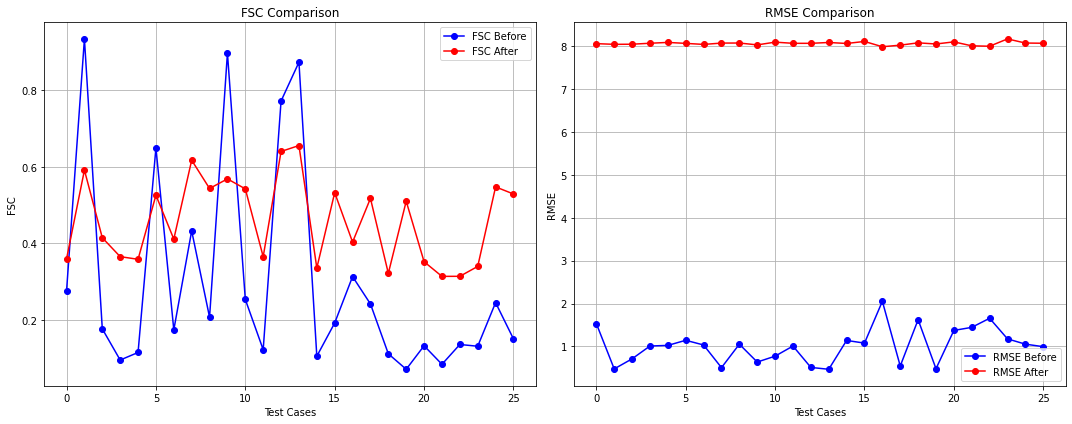

In [17]:
## OLD, save for reference but do not rerun

fsc_before_avg = [(value - 1) / -1 for value in fsc_values_before_test]
fsc_after_avg = [(value - 1) / -1 for value in fsc_values_test]
rmse_before_avg = [(value) / .1 for value in rmse_values_before_test]
rmse_after_avg = [(value) / .1 for value in rmse_values_test]

# Creating the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns of subplots
# Plotting FSC losses
ax[0].plot(fsc_before_avg, label='FSC Before', marker='o', color='blue')
ax[0].plot(fsc_after_avg, label='FSC After', marker='o', color='red')
ax[0].set_title('FSC Comparison')
ax[0].set_xlabel('Test Cases')
ax[0].set_ylabel('FSC')
ax[0].legend()
ax[0].grid(True)

# Plotting RMSD losses
ax[1].plot(rmse_before_avg, label='RMSE Before', color='blue', marker='o')
ax[1].plot(rmse_after_avg, label='RMSE After', color='red', marker='o')
ax[1].set_title('RMSE Comparison')
ax[1].set_xlabel('Test Cases')
ax[1].set_ylabel('RMSE')
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

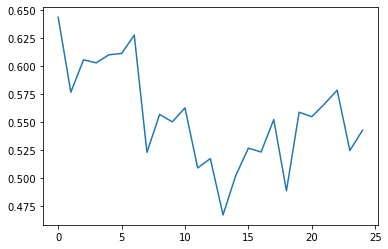

In [24]:
plt.plot(fsc_loss_values["subset_chain"]["2YEW"])


In [25]:
fsc_loss_values.keys()

dict_keys(['subset_chain', 'box_chain', 'box_non_chain'])

In [ ]:
for pdb in fsc_loss_values["subset_chain"]:
    plt.plot(1 - np.array(fsc_loss_values["subset_chain"][pdb]), label="subset chain")
    # plt.plot(1 - np.array(fsc_loss_values["box_non_chain"][pdb]), label="nonchain")
    plt.legend()
    plt.ylabel("FSC")
    plt.ylim((0,1))
    plt.title(pdb)
    plt.show()

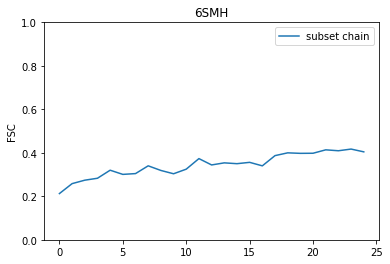

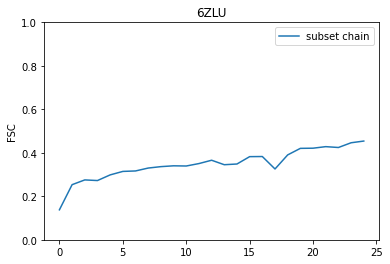

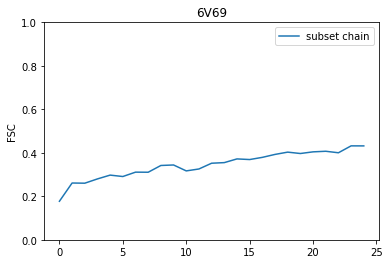

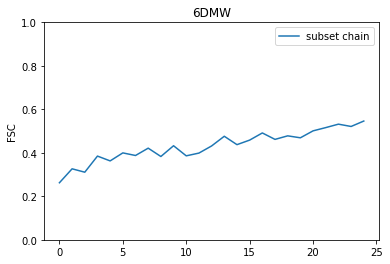

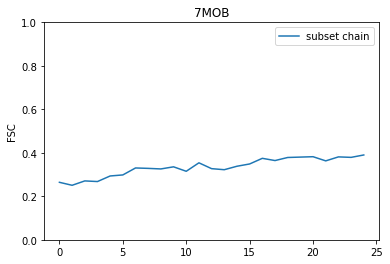

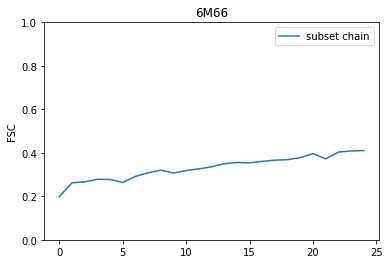

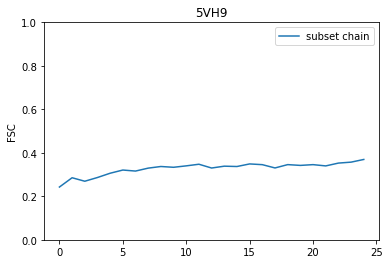

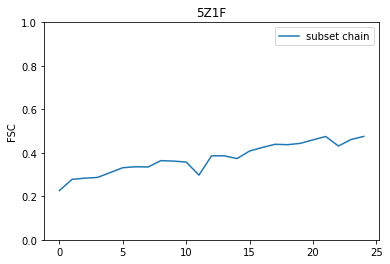

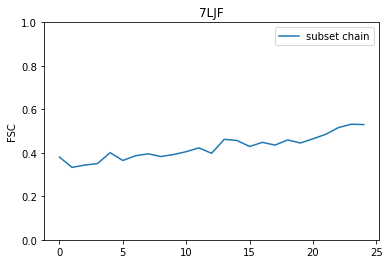

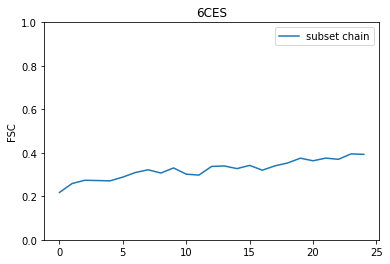

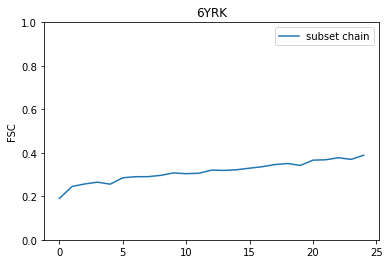

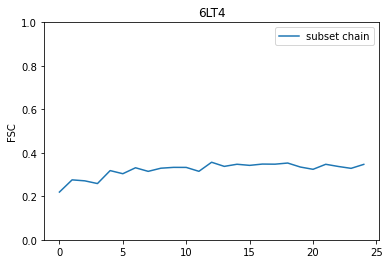

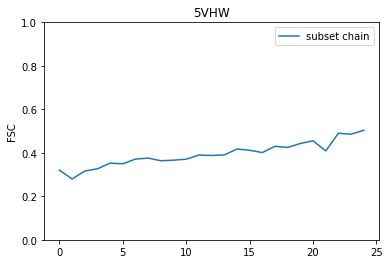

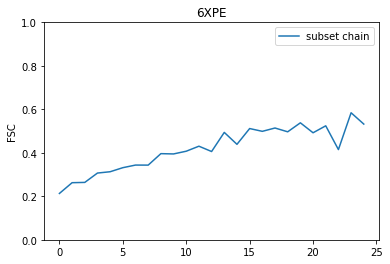

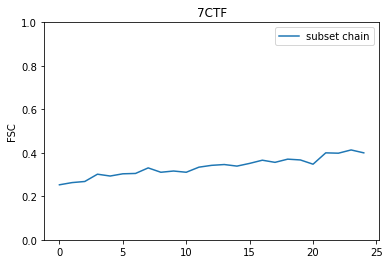

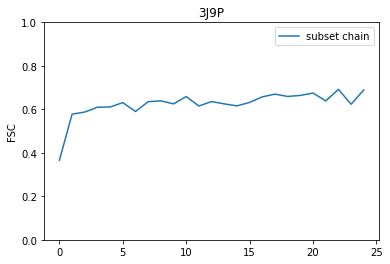

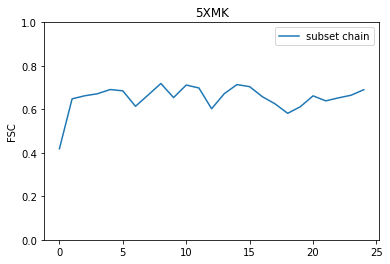

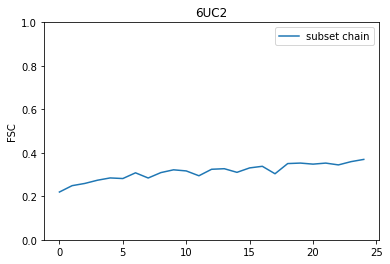

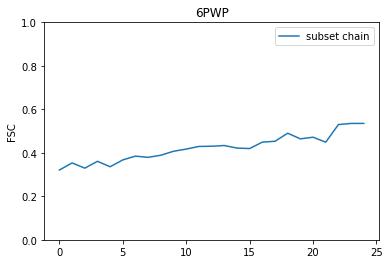

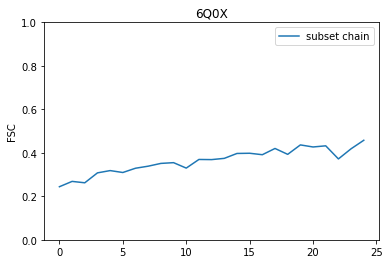

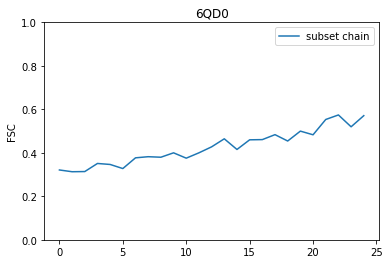

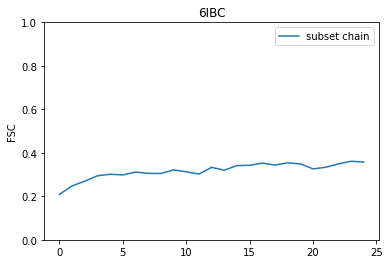

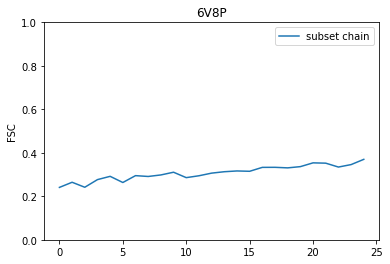

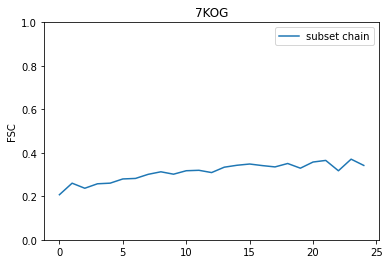

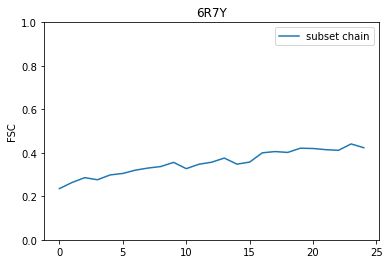

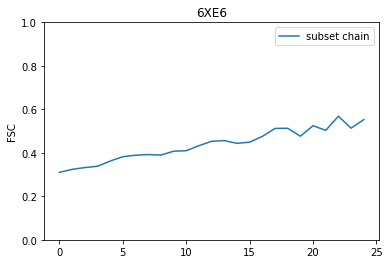

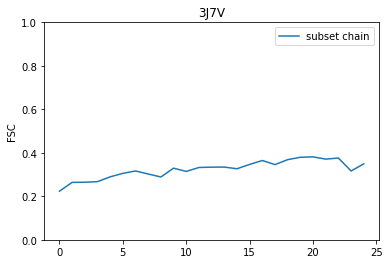

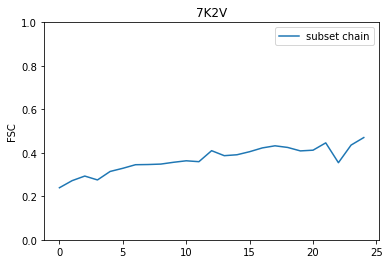

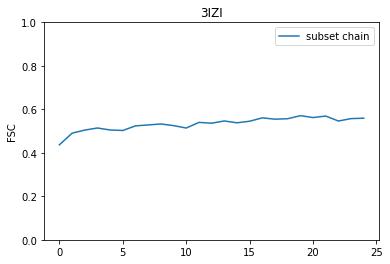

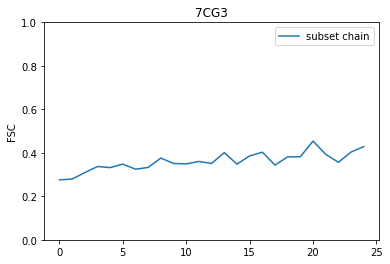

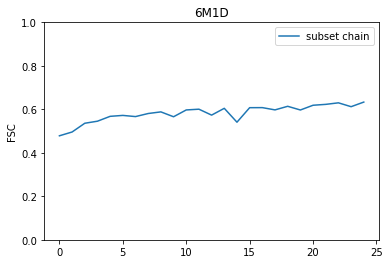

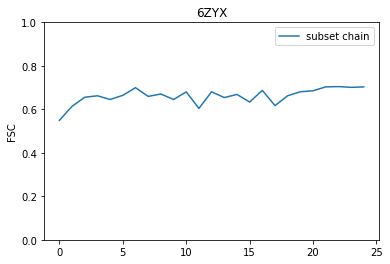

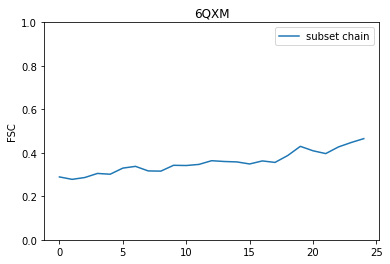

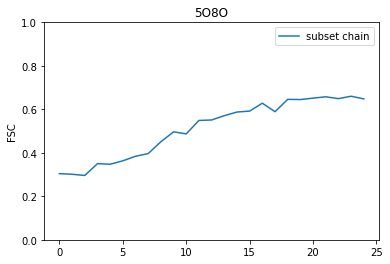

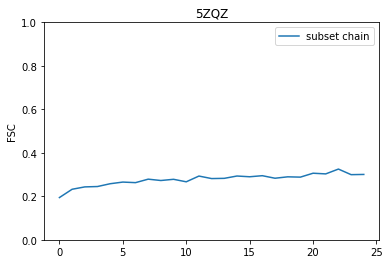

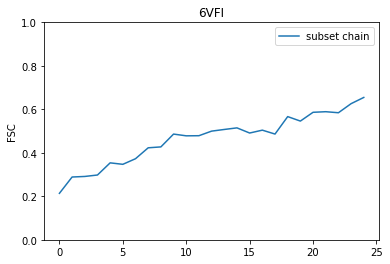

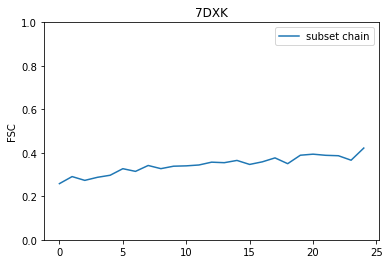

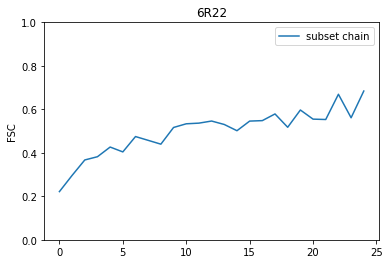

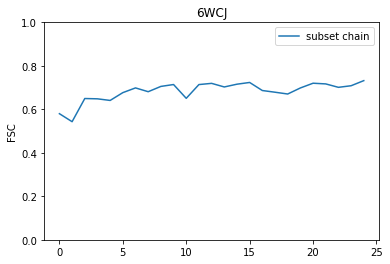

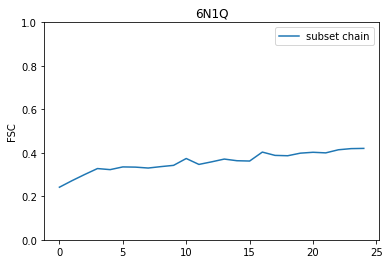

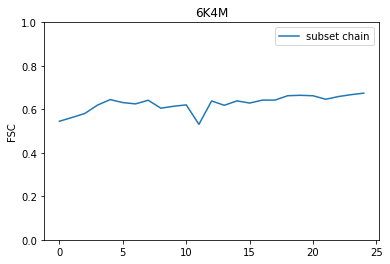

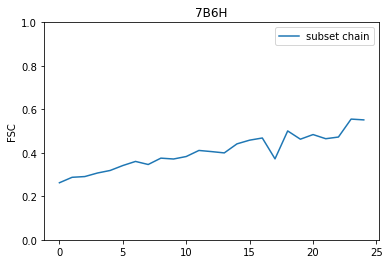

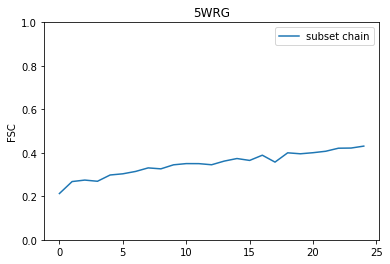

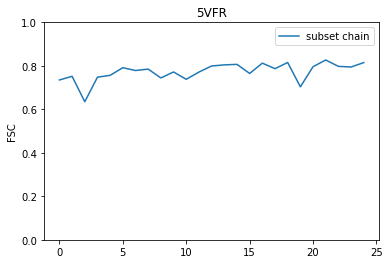

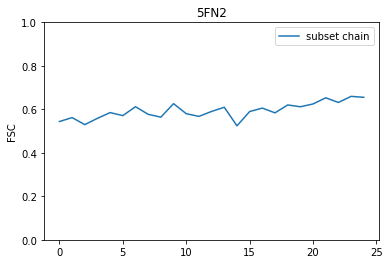

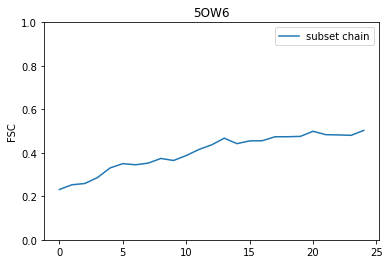

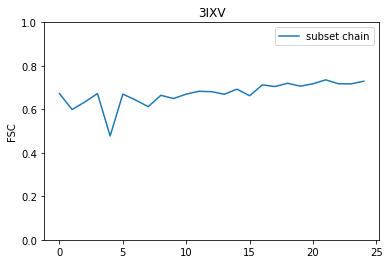

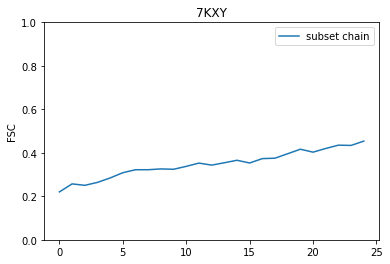

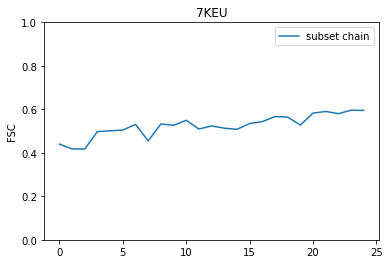

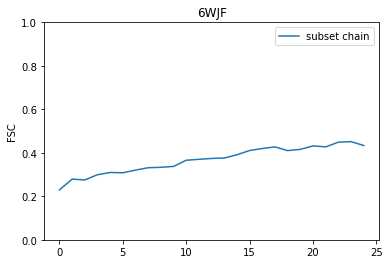

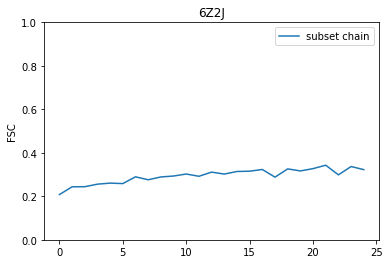

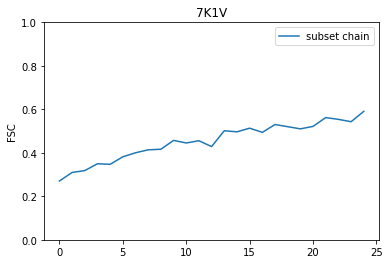

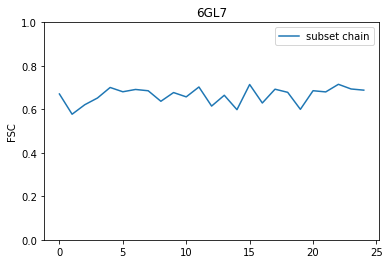

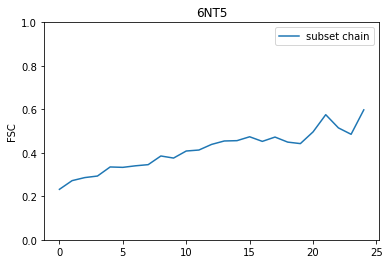

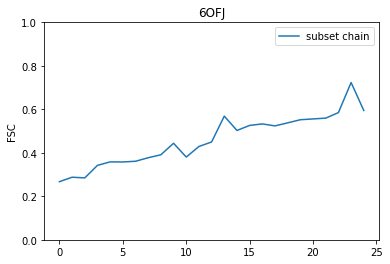

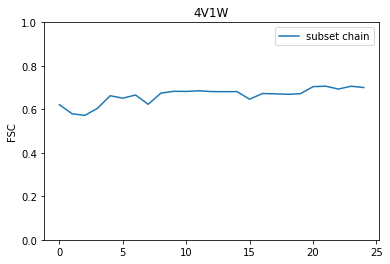

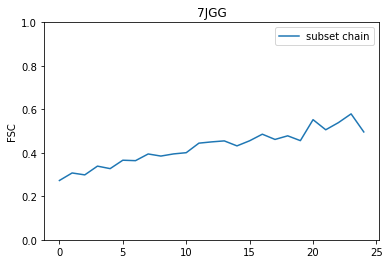

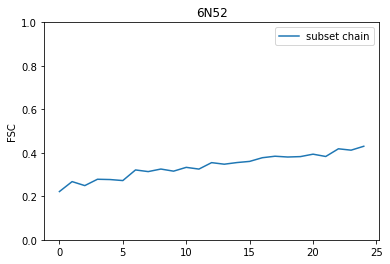

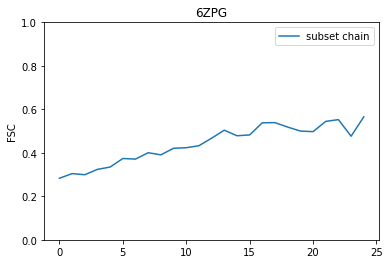

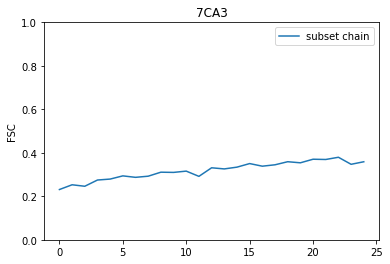

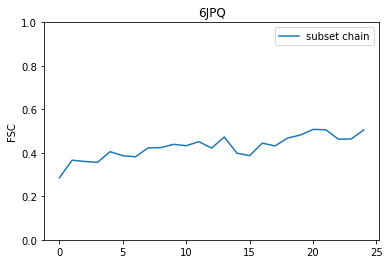

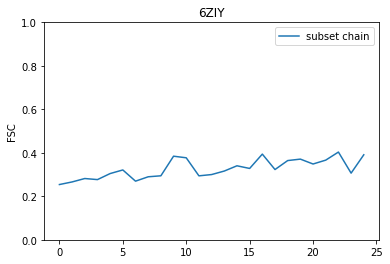

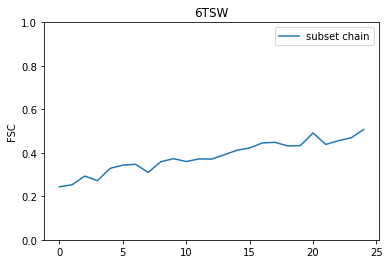

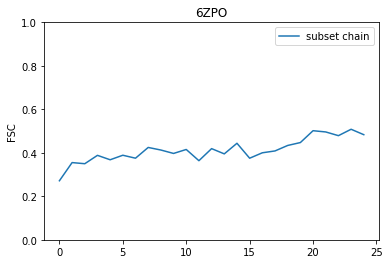

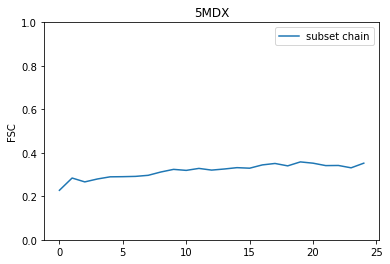

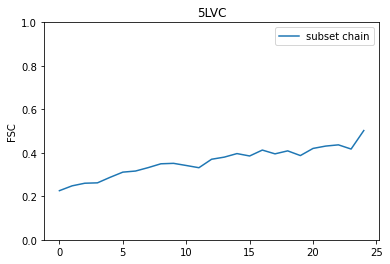

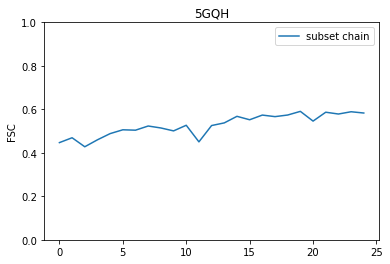

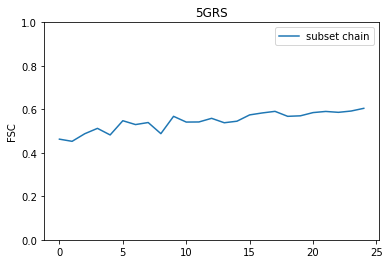

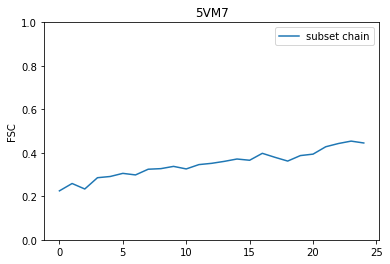

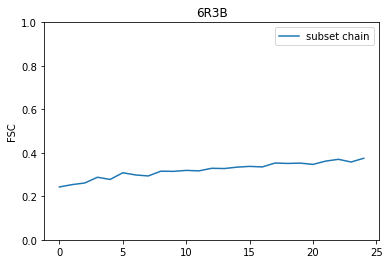

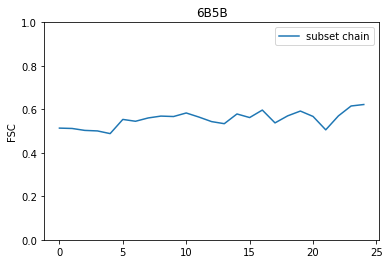

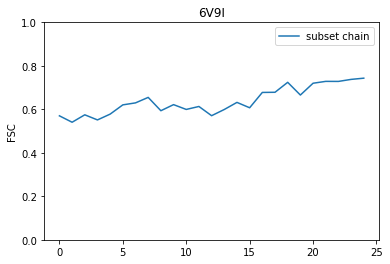

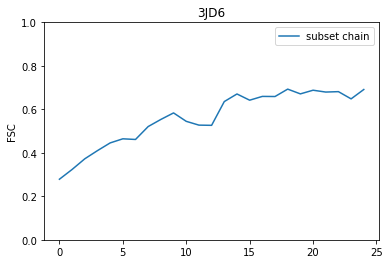

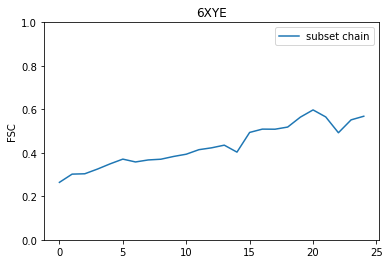

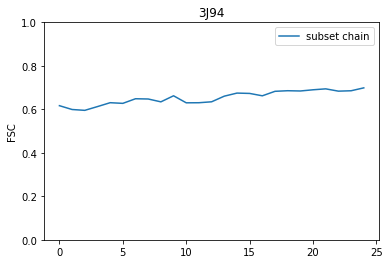

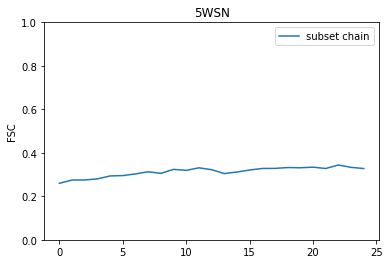

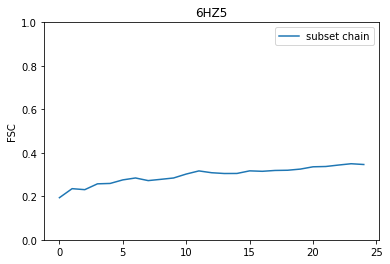

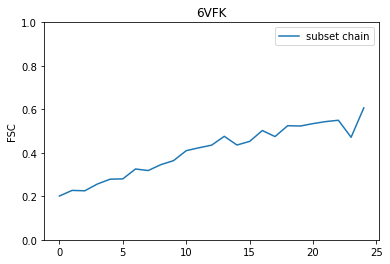

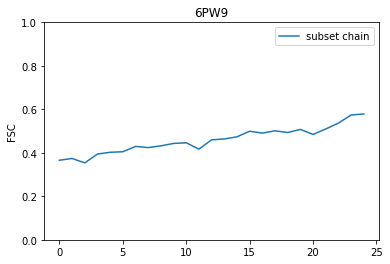

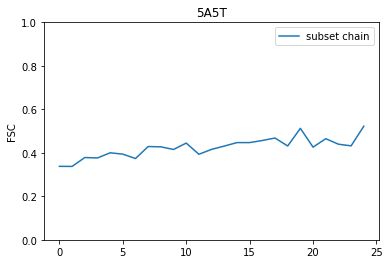

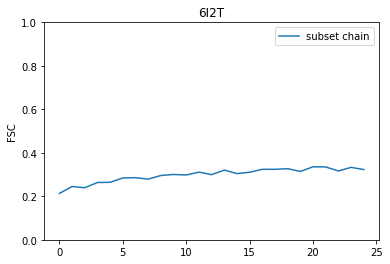

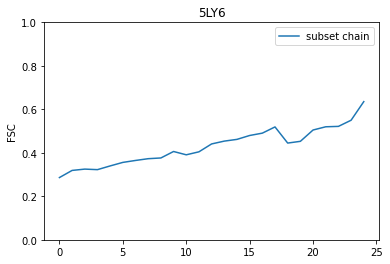

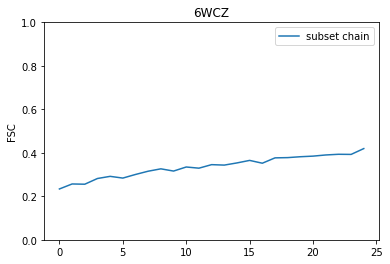

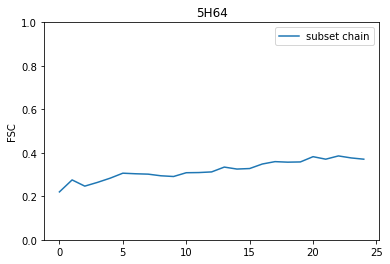

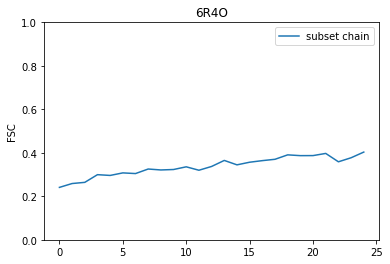

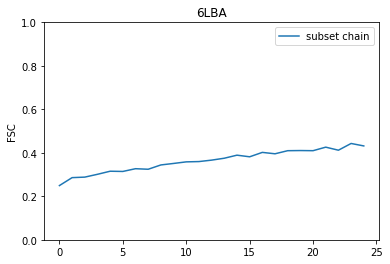

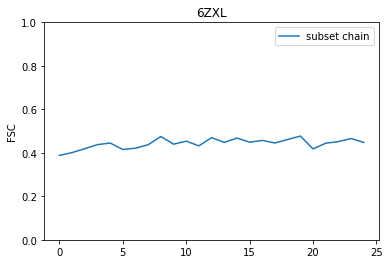

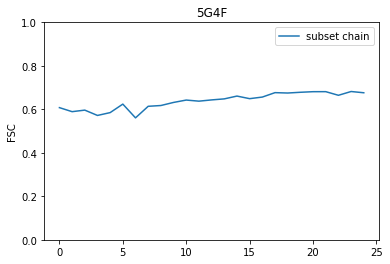

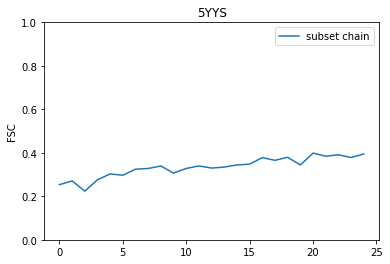

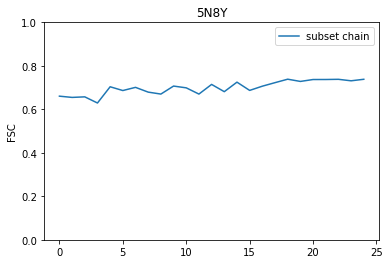

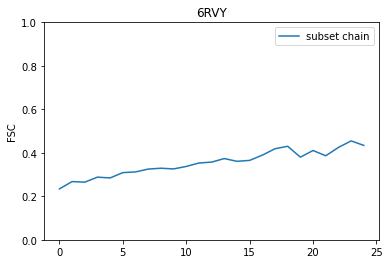

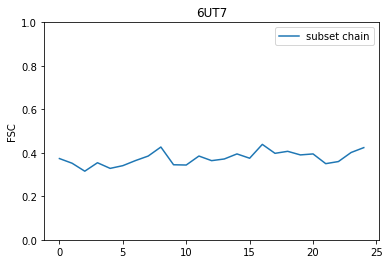

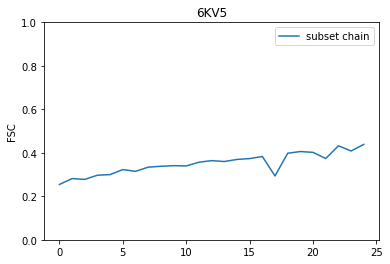

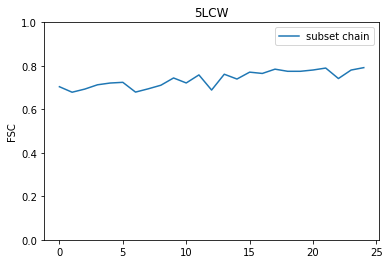

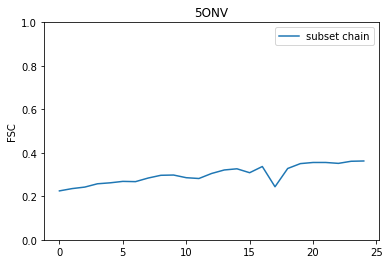

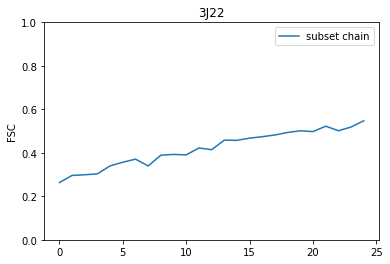

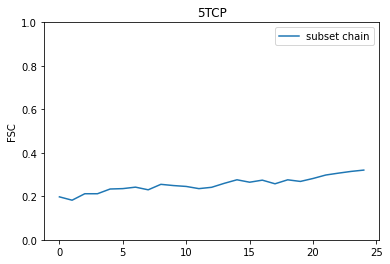

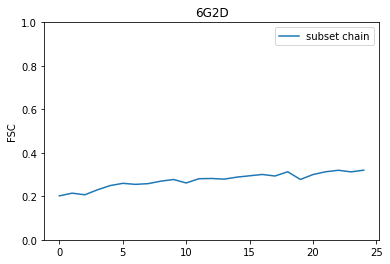

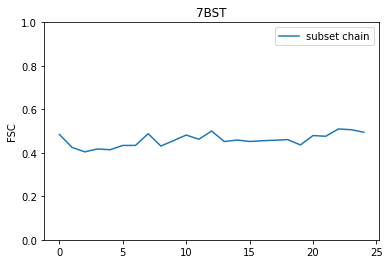

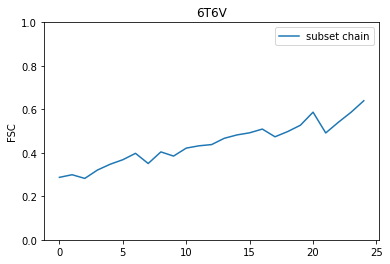

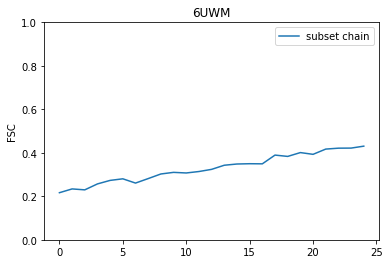

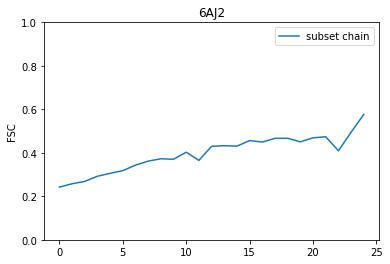

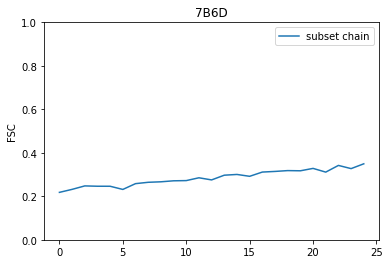

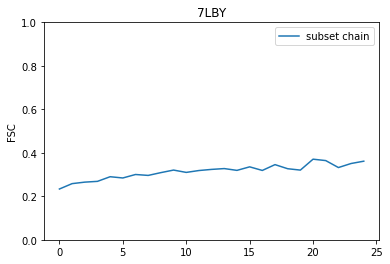

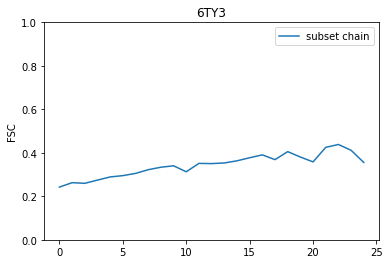

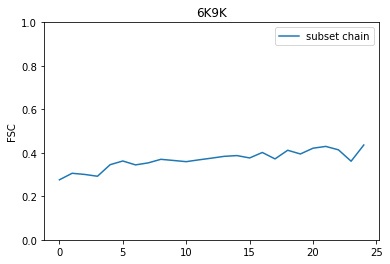

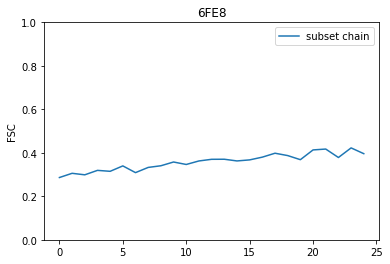

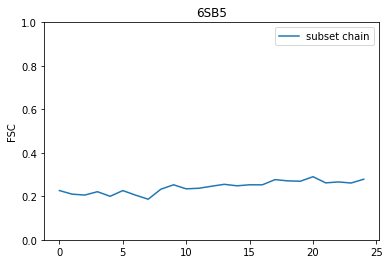

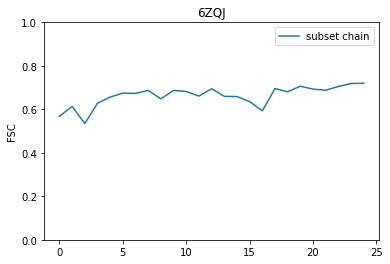

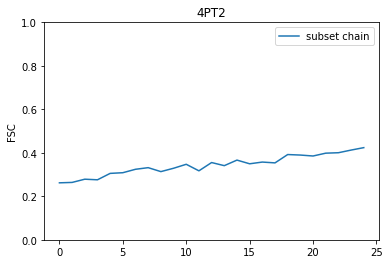

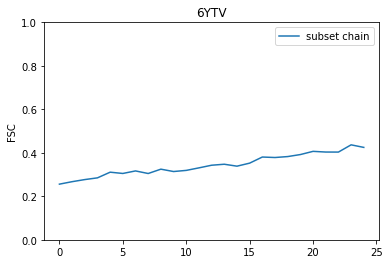

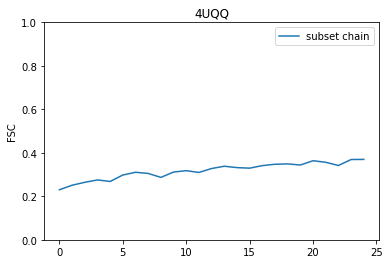

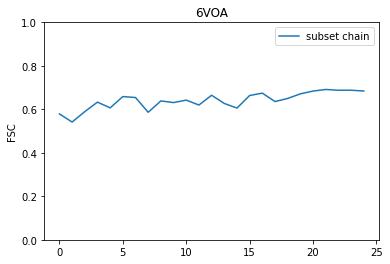

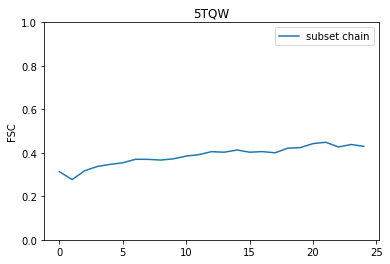

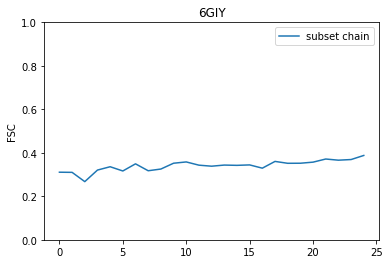

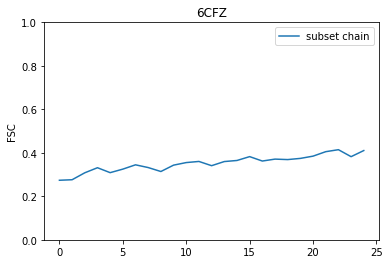

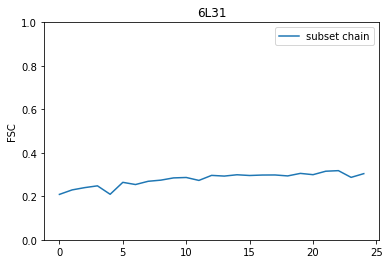

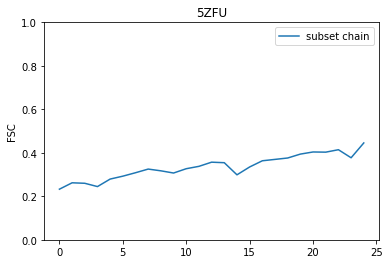

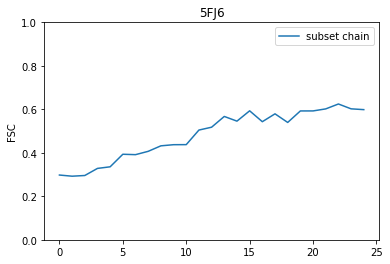

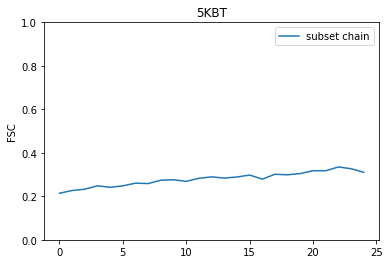

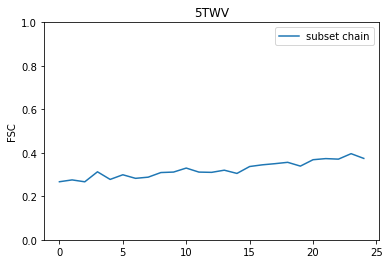

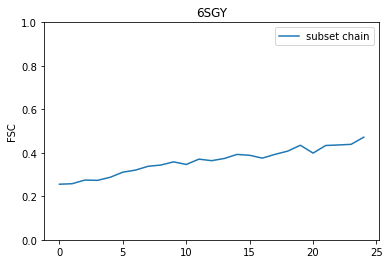

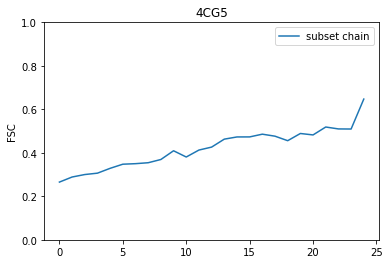

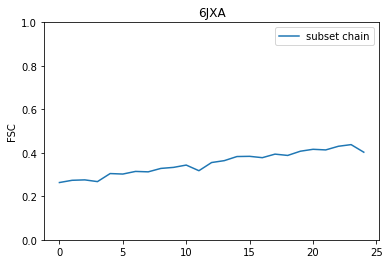

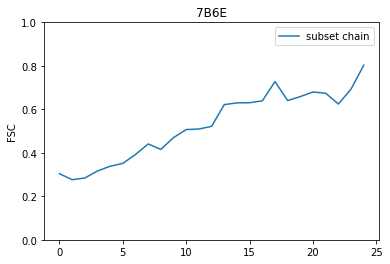

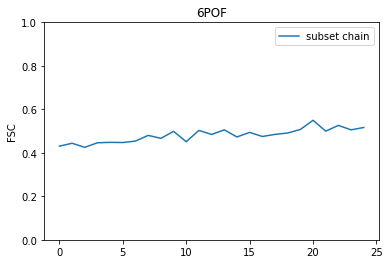

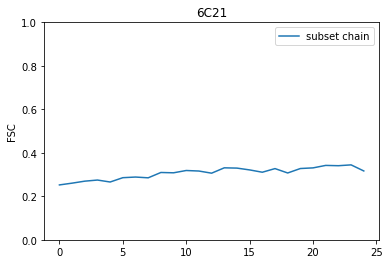

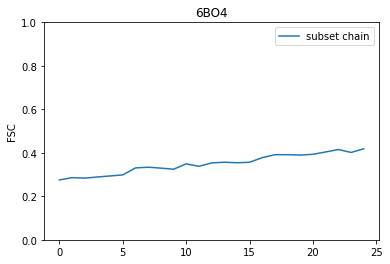

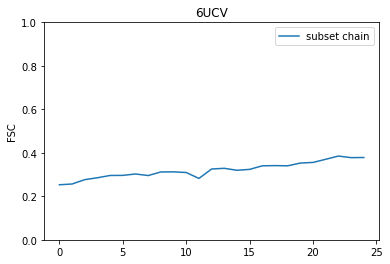

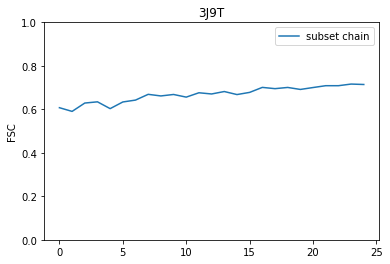

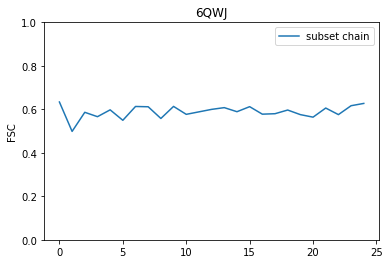

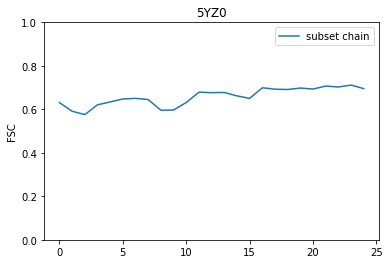

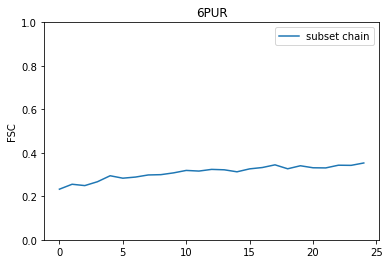

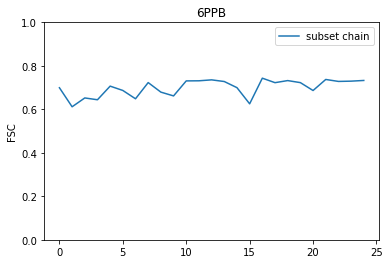

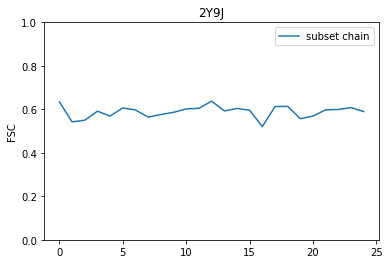

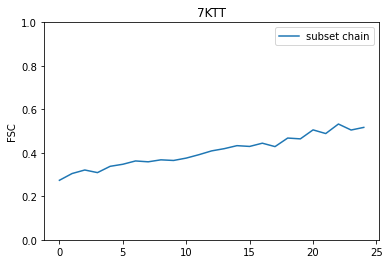

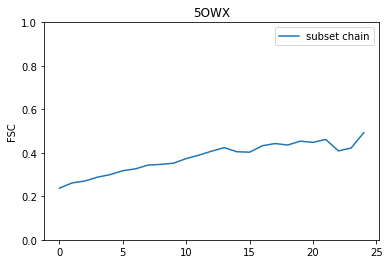

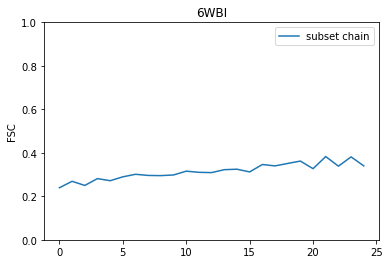

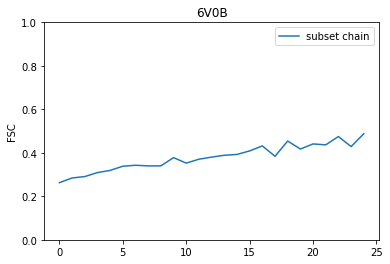

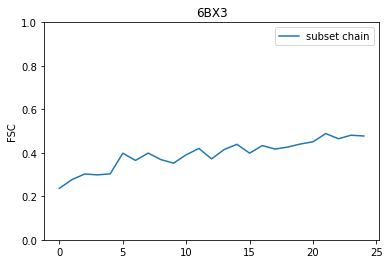

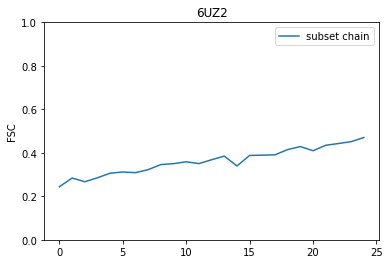

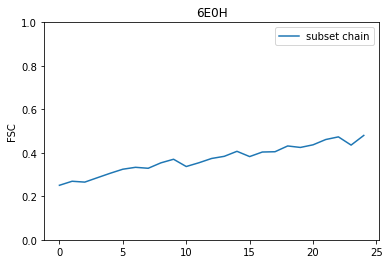

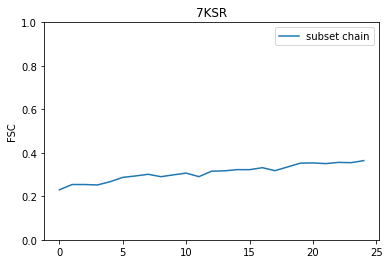

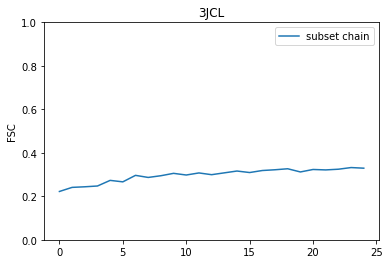

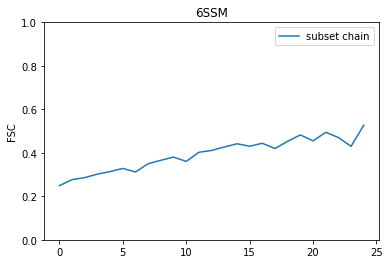

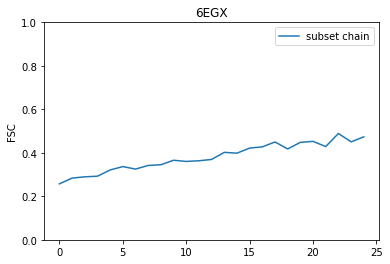

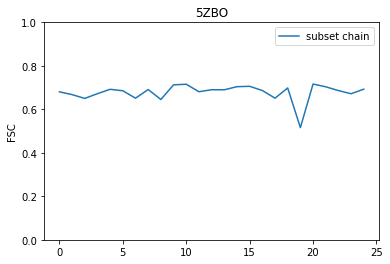

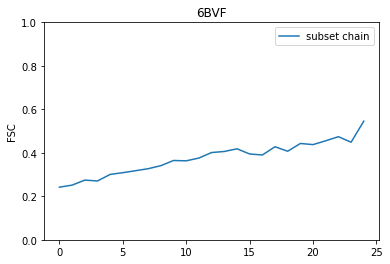

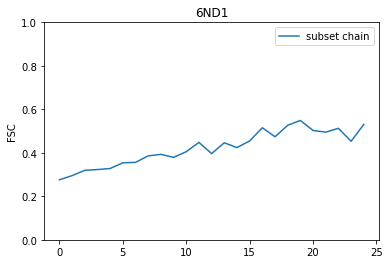

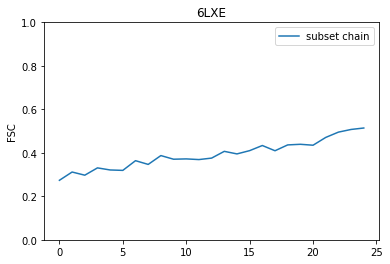

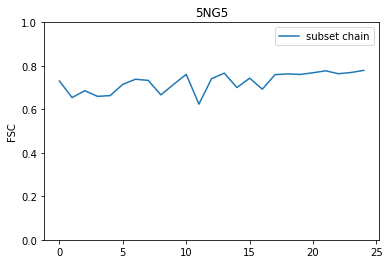

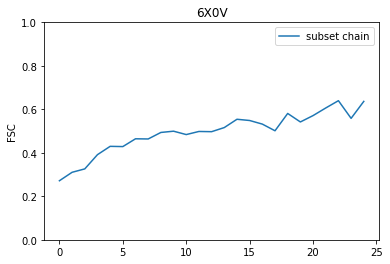

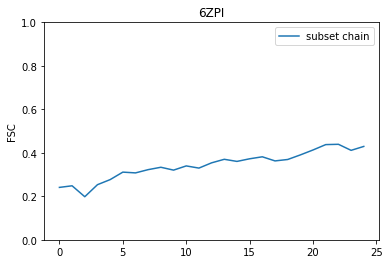

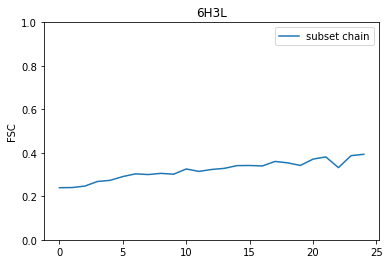

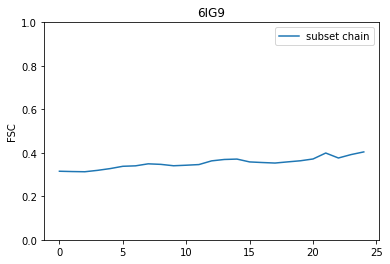

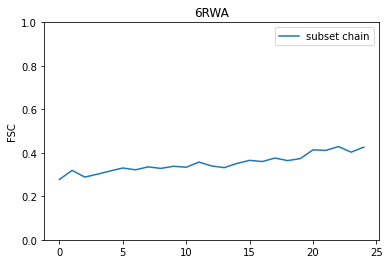

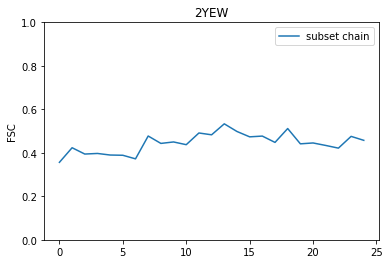

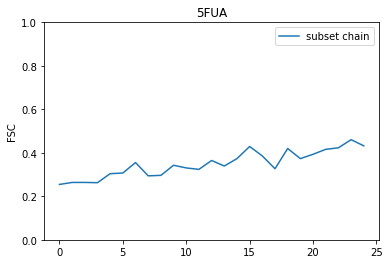

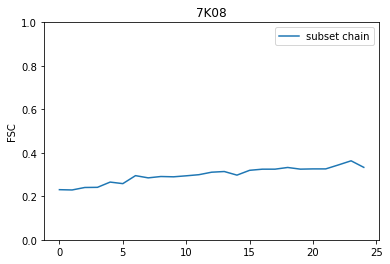

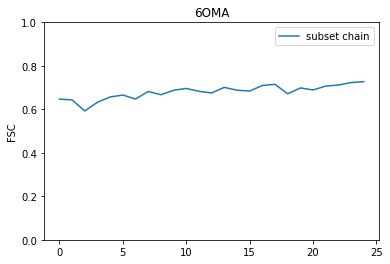

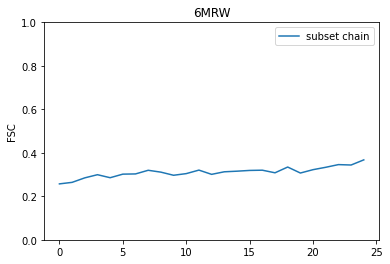

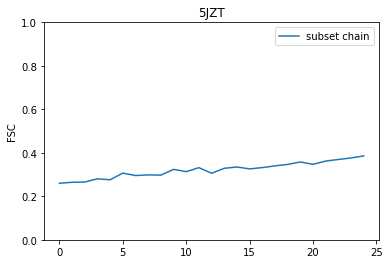

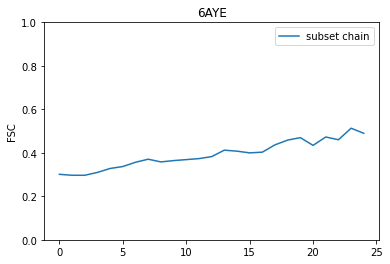

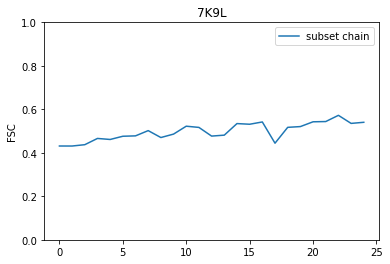

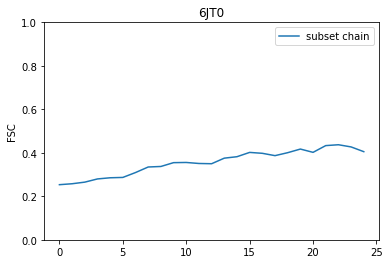

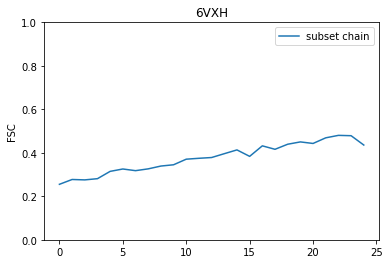

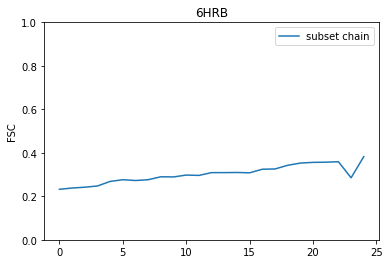

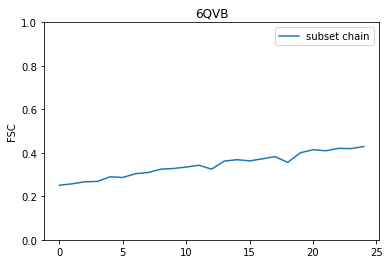

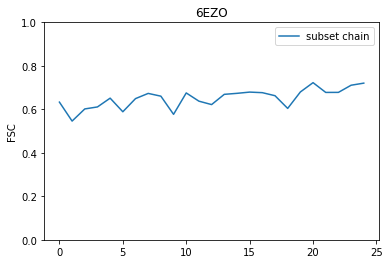

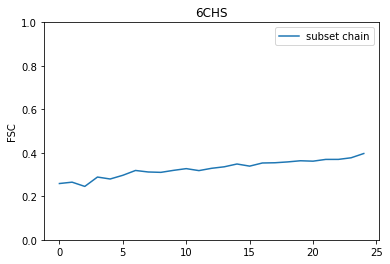

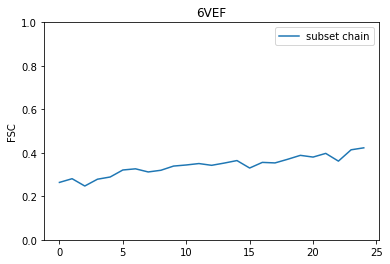

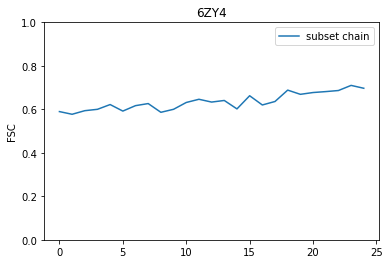

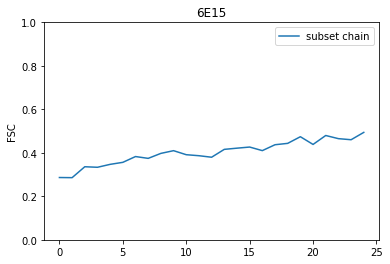

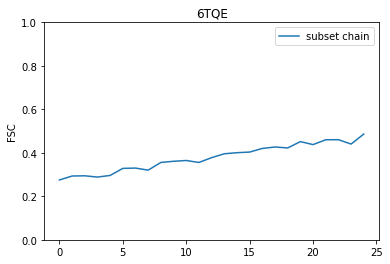

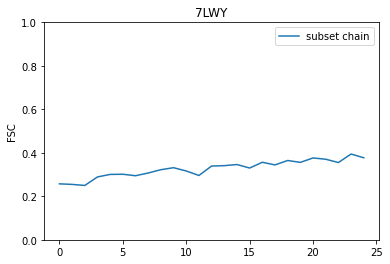

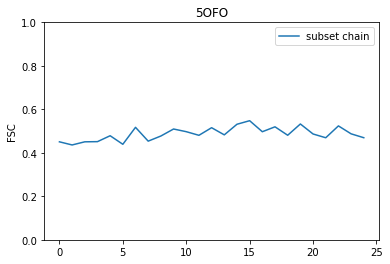

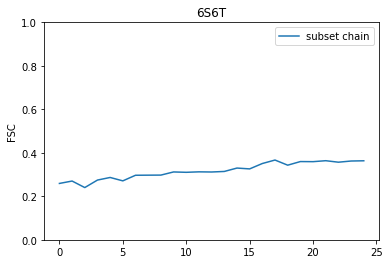

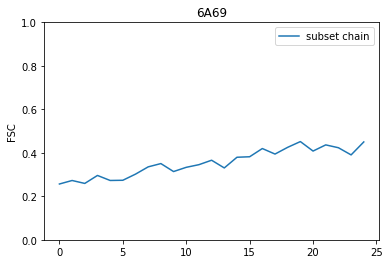

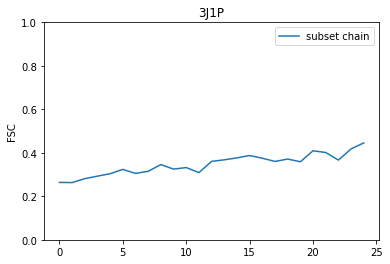

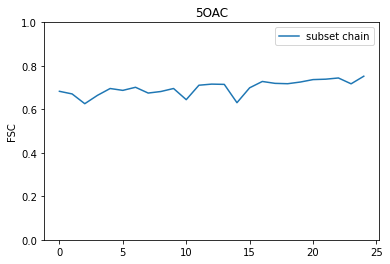

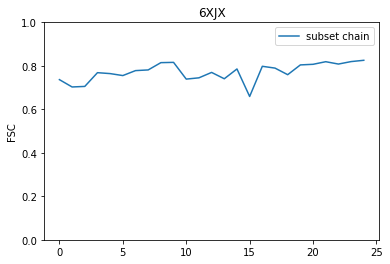

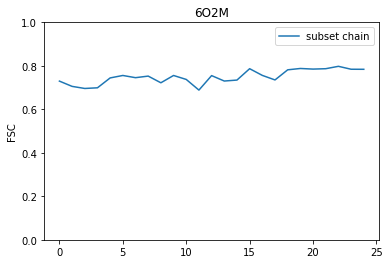

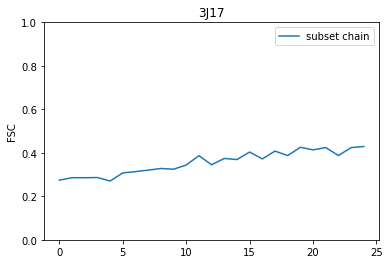

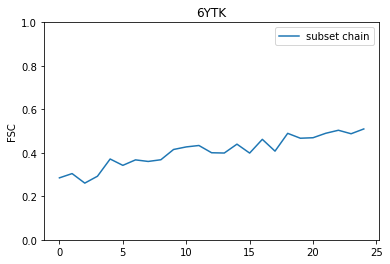

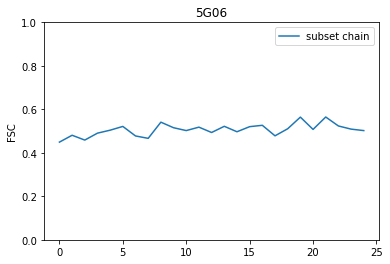

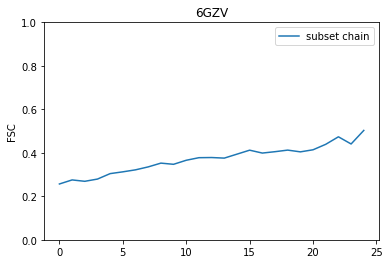

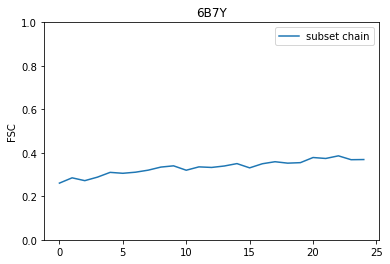

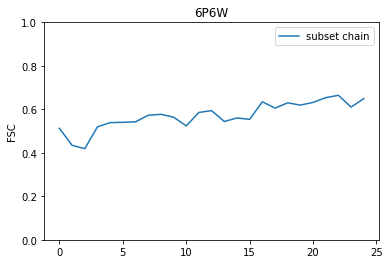

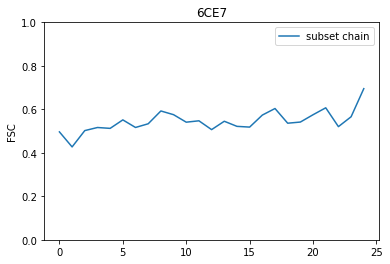

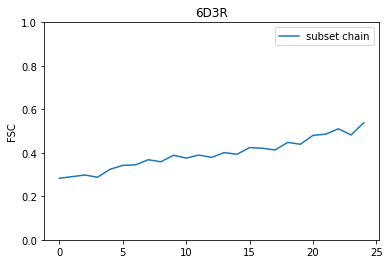

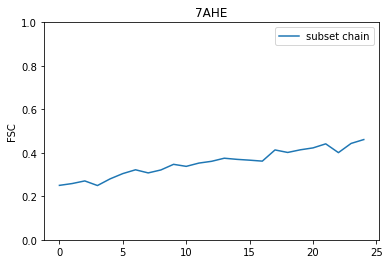

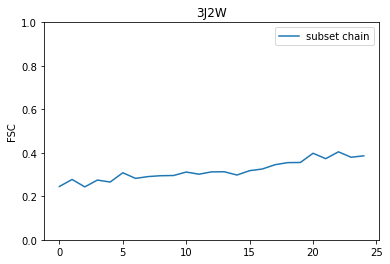

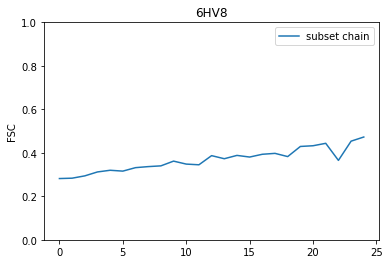

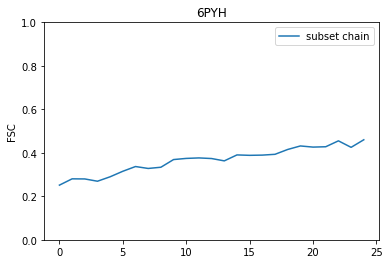

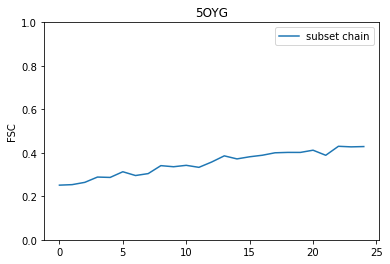

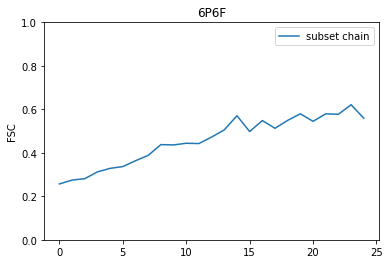

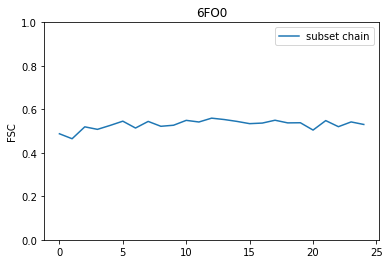

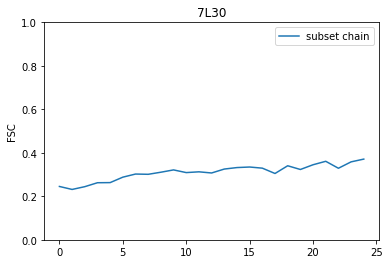

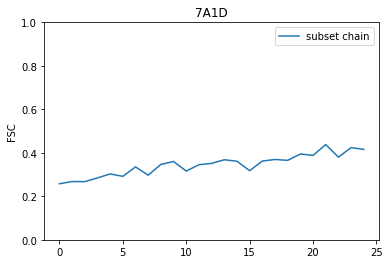

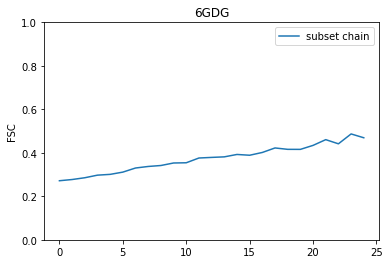

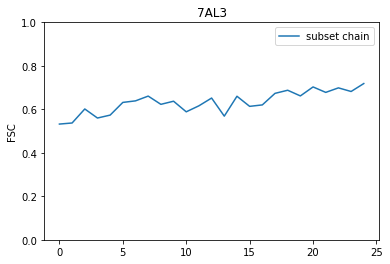

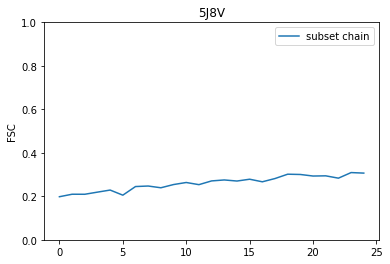

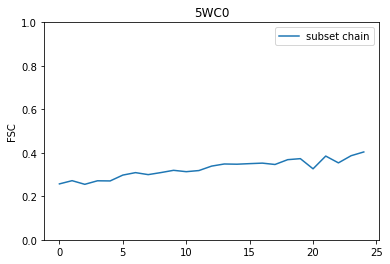

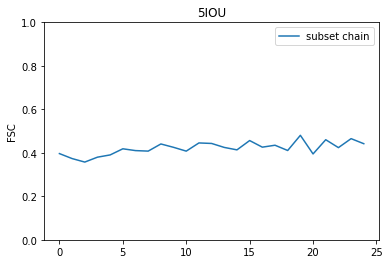

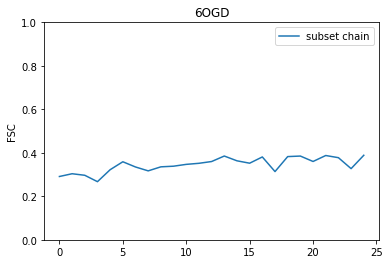

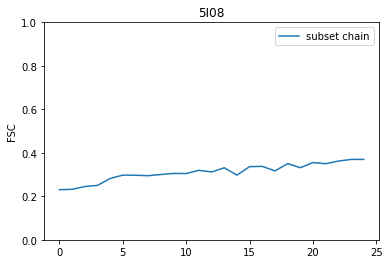

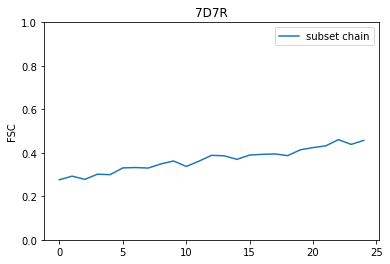

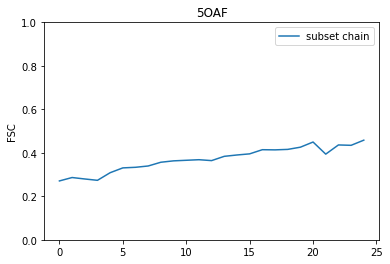

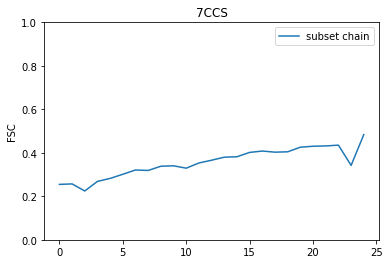

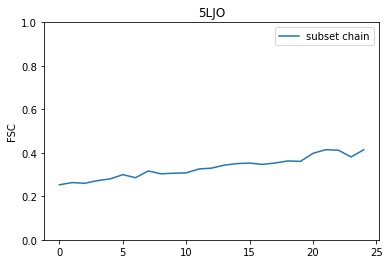

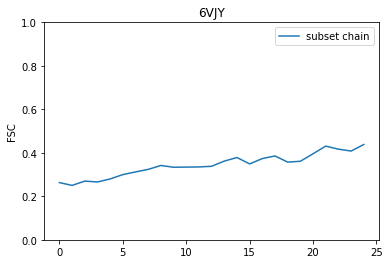

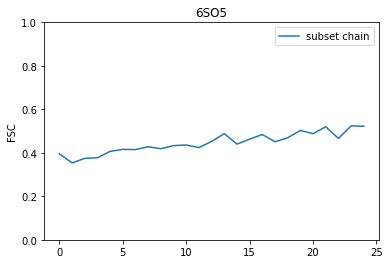

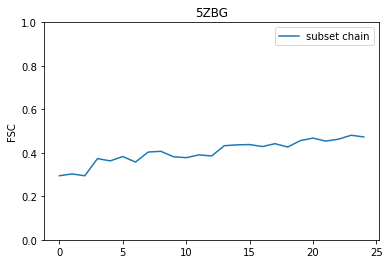

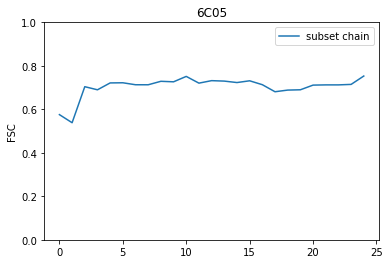

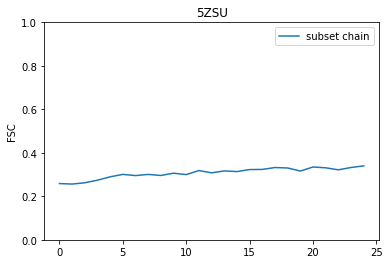

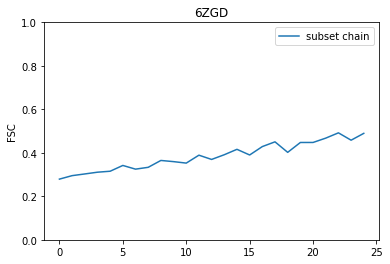

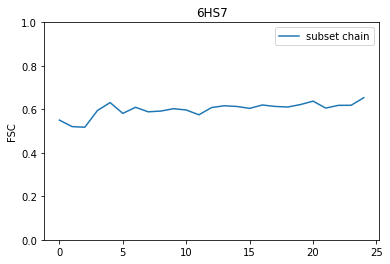

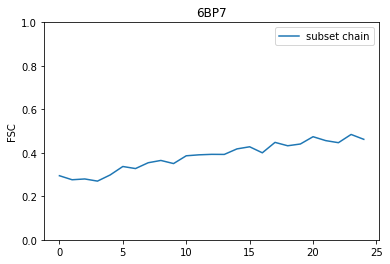

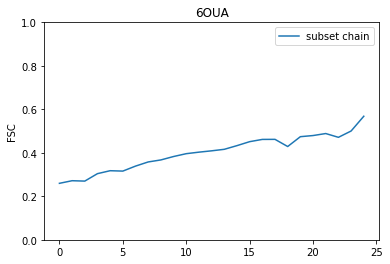

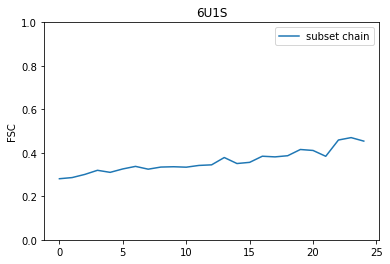

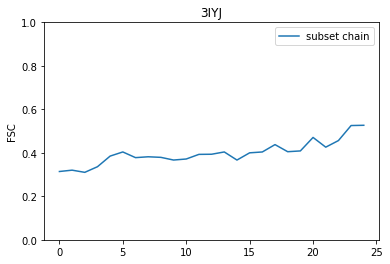

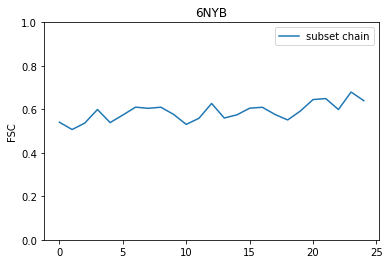

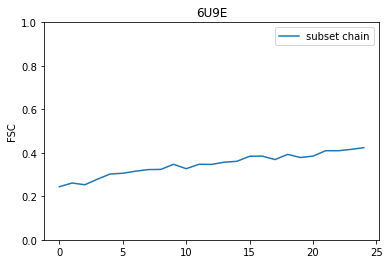

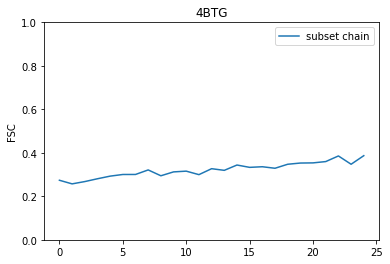

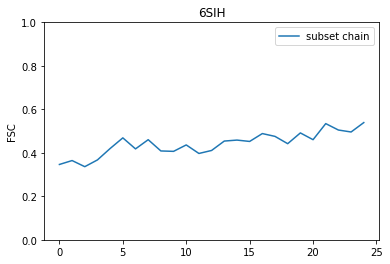

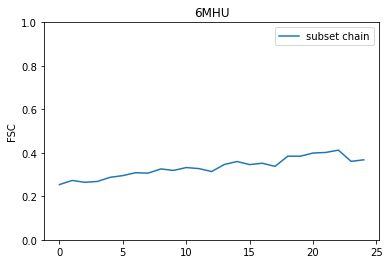

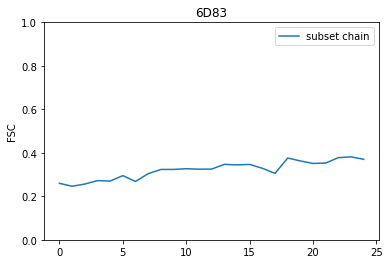

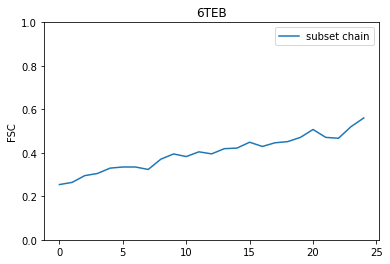

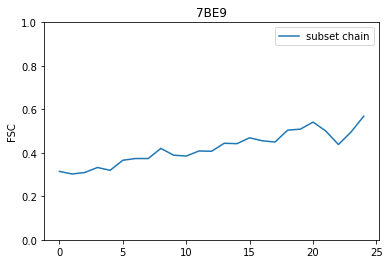

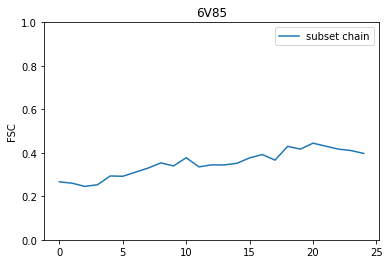

In [36]:
for pdb in fsc_loss_values["subset_chain"]:
    plt.plot(1 - np.array(fsc_loss_values["subset_chain"][pdb]), label="subset chain")
    # plt.plot(1 - np.array(fsc_loss_values["box_non_chain"][pdb]), label="nonchain")
    plt.legend()
    plt.ylabel("FSC")
    plt.ylim((0,1))
    plt.title(pdb)
    plt.show()

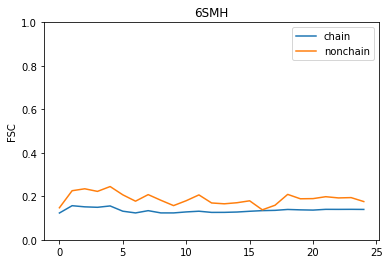

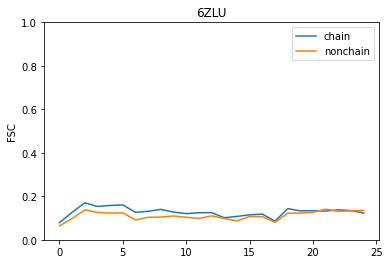

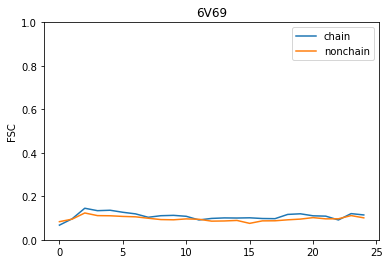

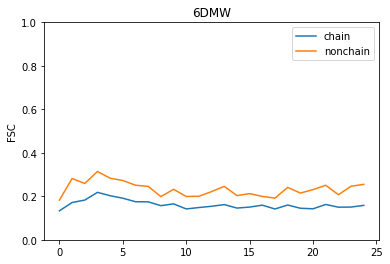

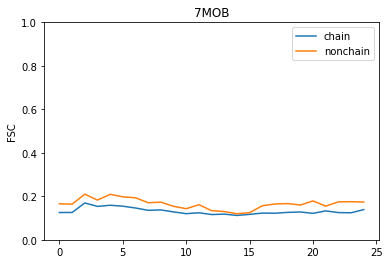

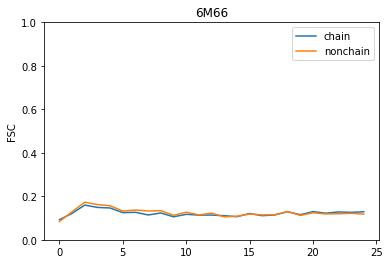

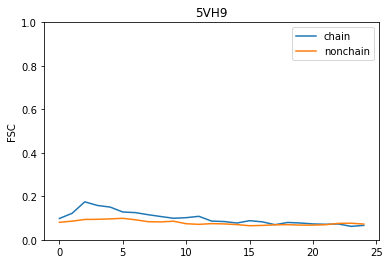

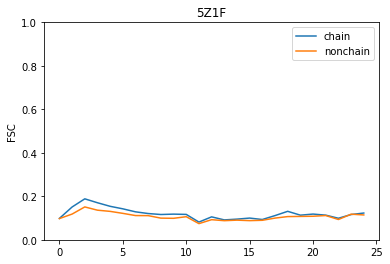

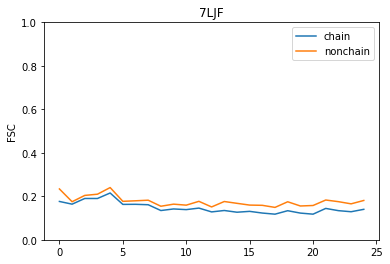

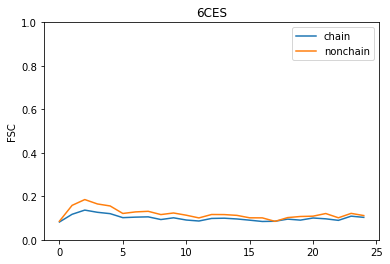

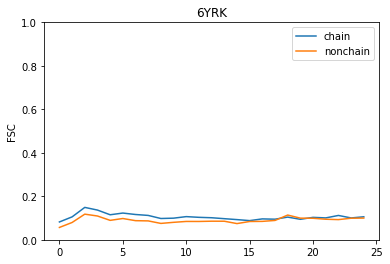

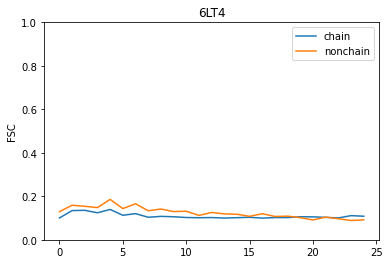

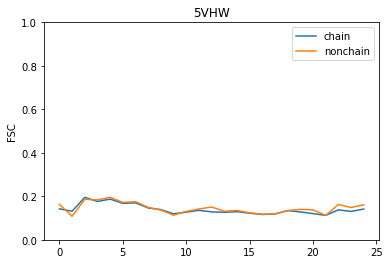

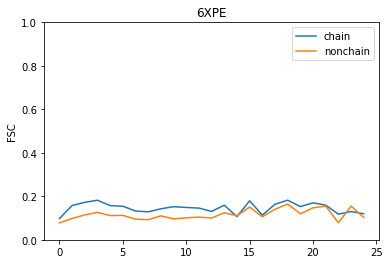

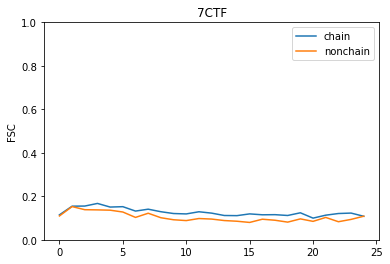

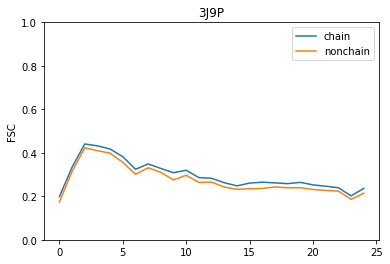

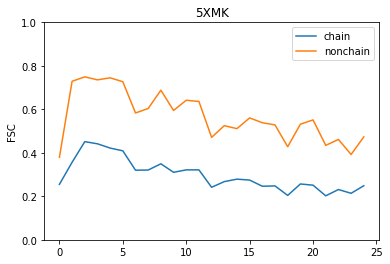

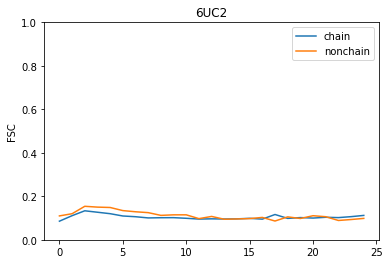

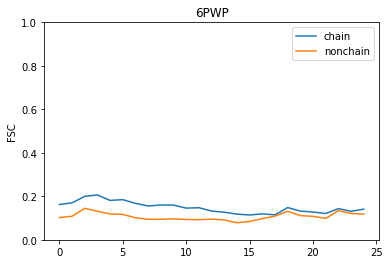

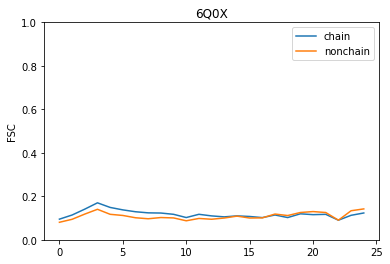

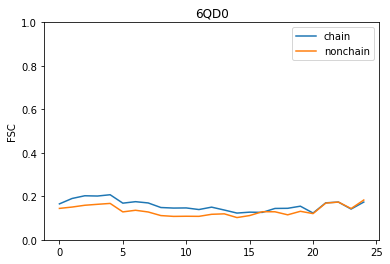

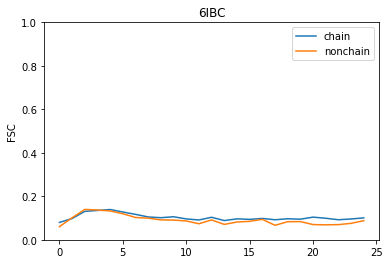

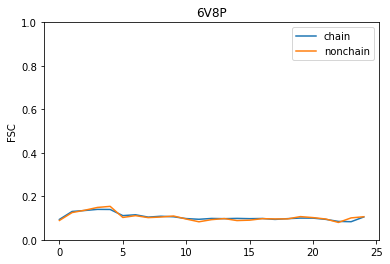

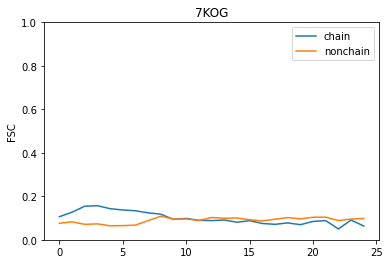

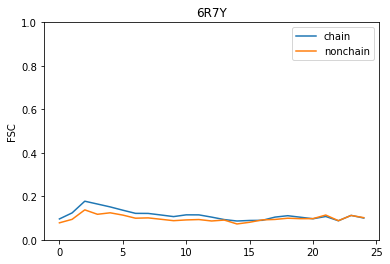

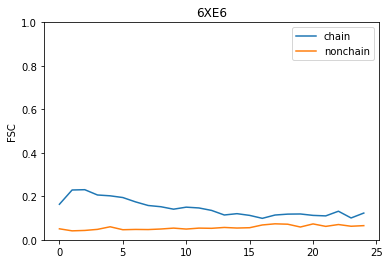

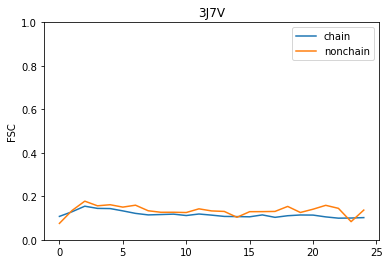

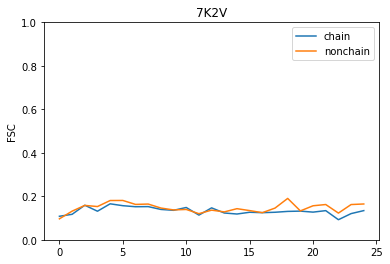

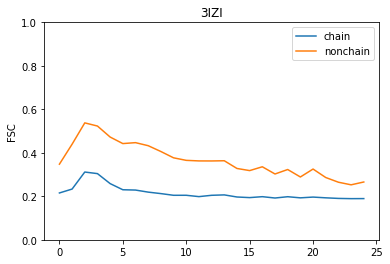

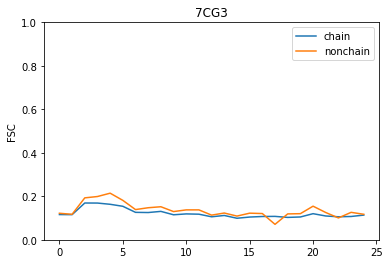

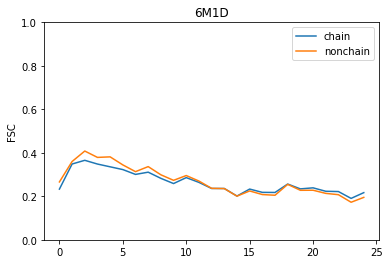

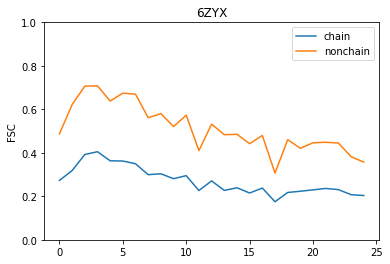

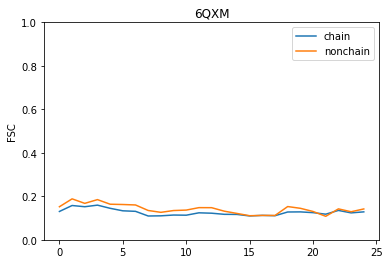

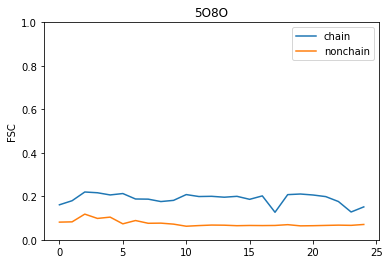

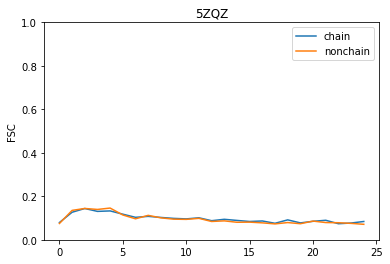

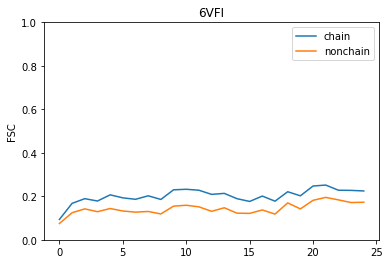

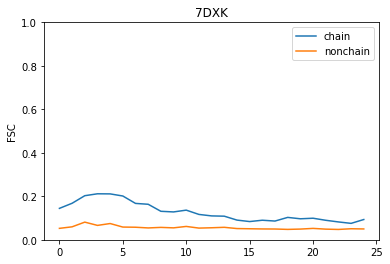

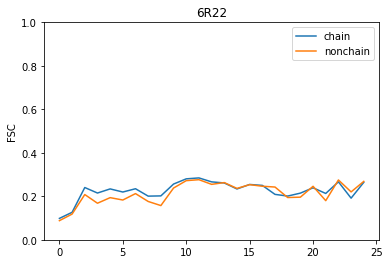

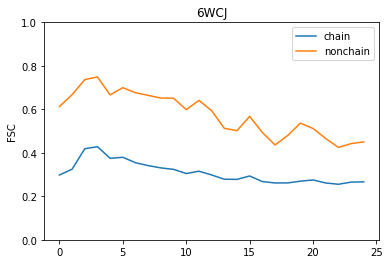

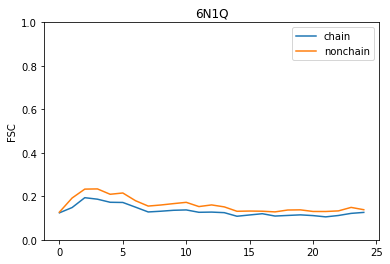

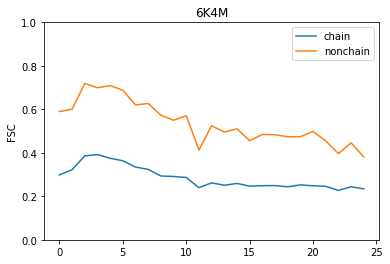

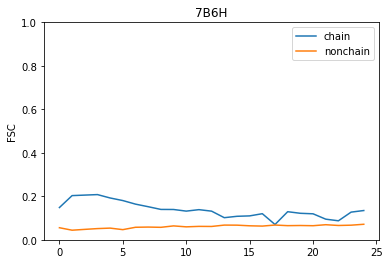

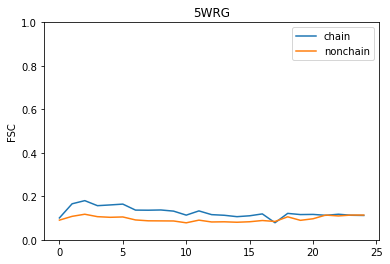

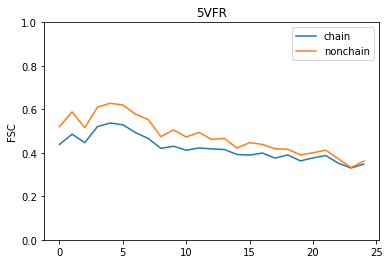

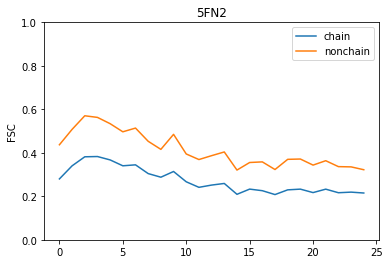

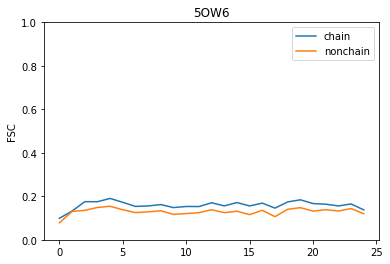

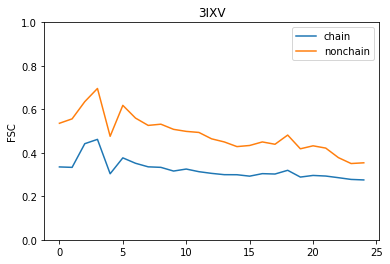

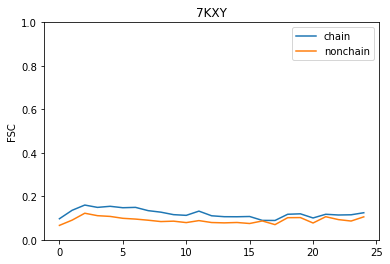

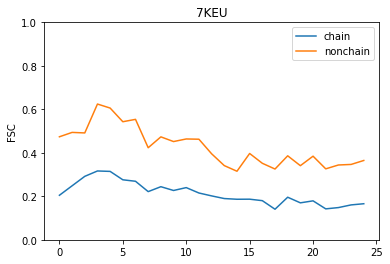

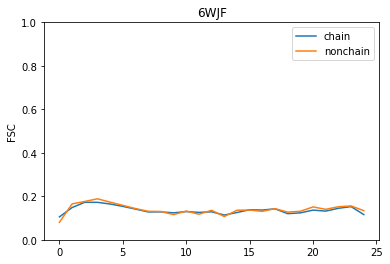

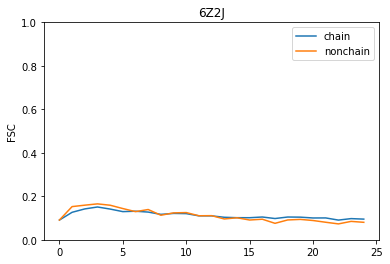

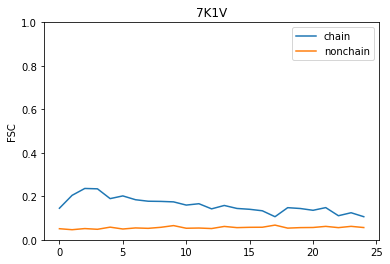

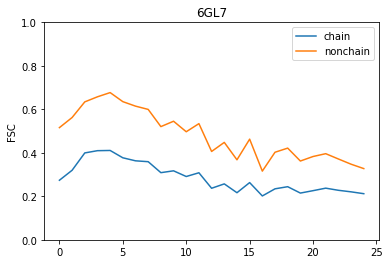

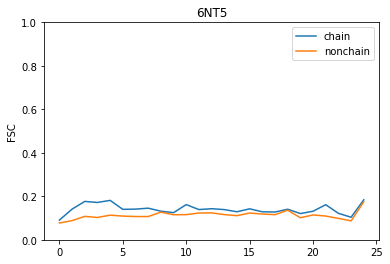

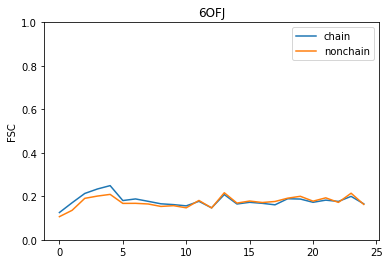

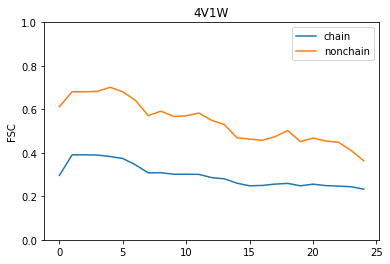

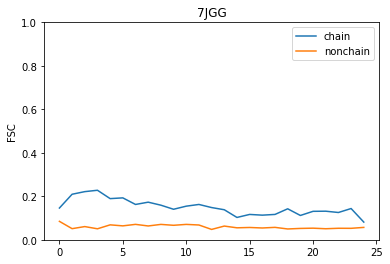

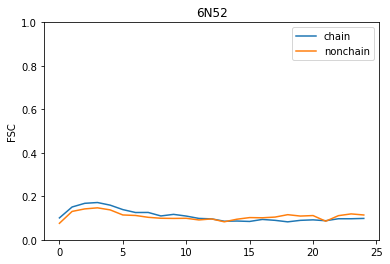

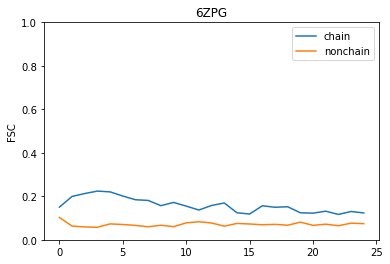

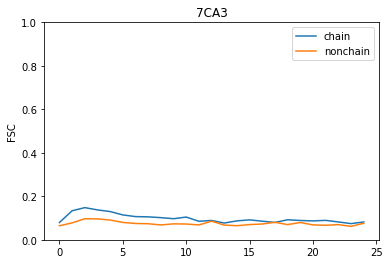

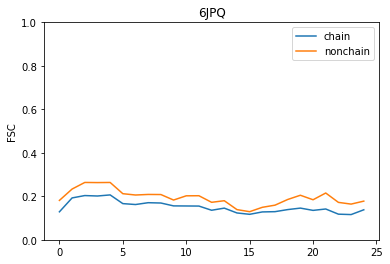

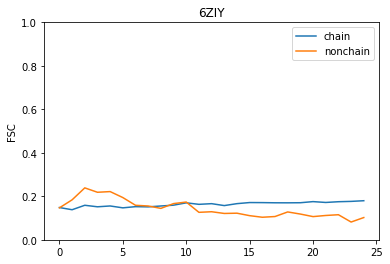

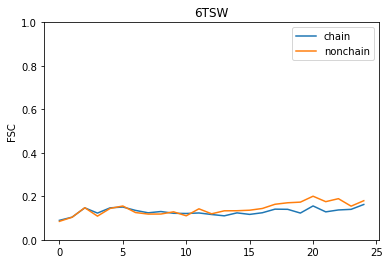

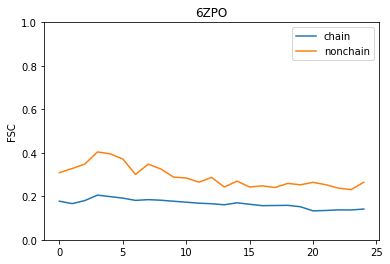

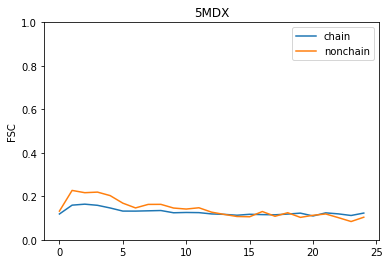

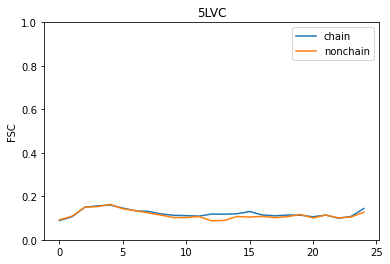

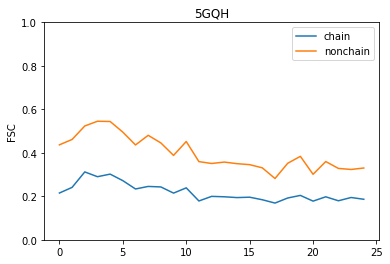

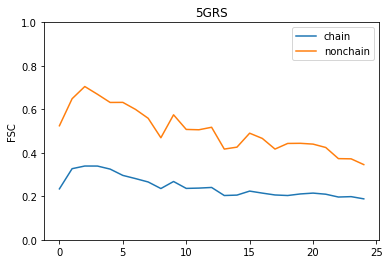

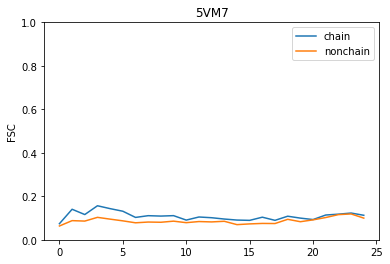

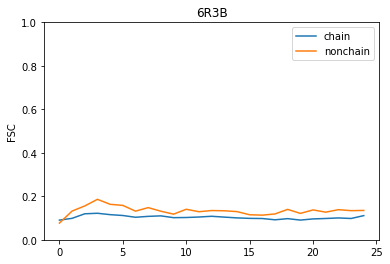

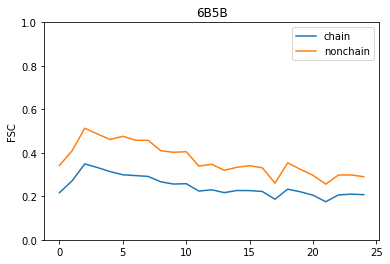

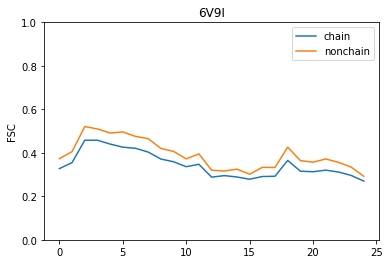

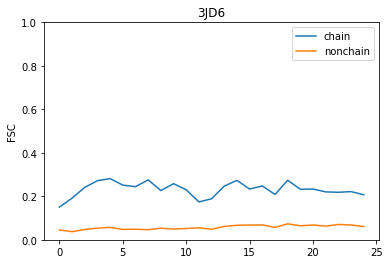

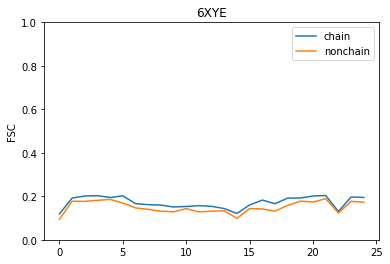

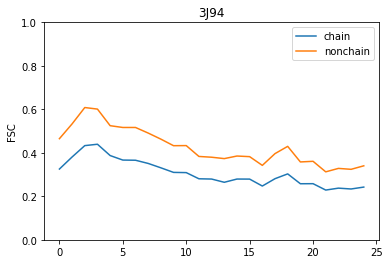

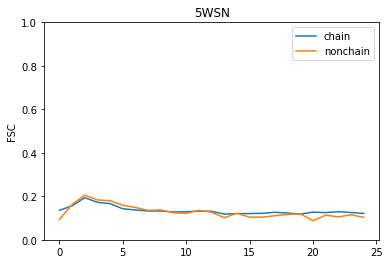

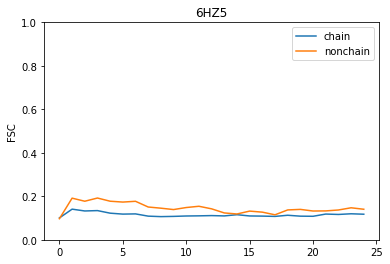

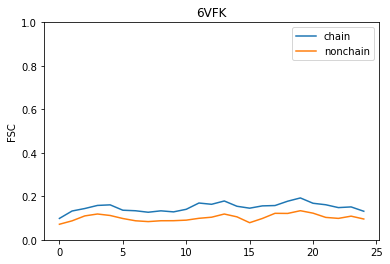

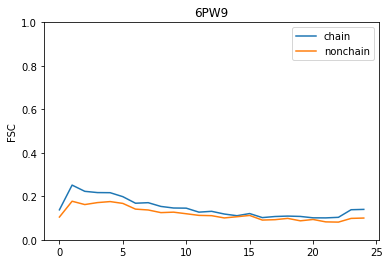

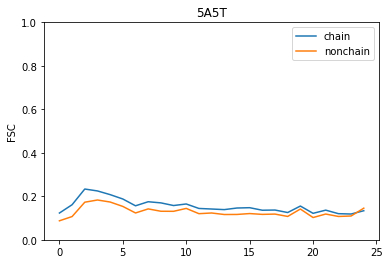

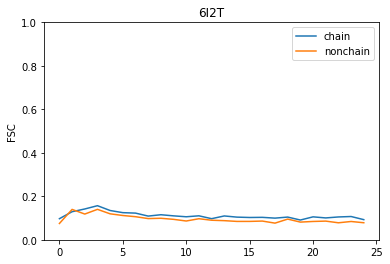

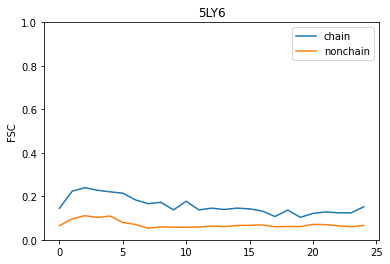

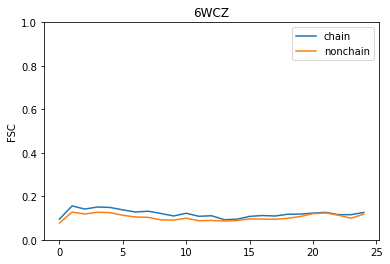

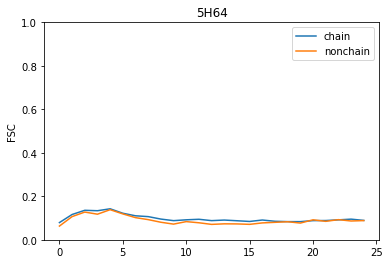

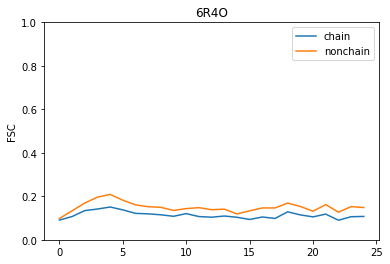

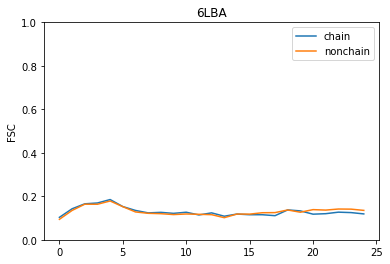

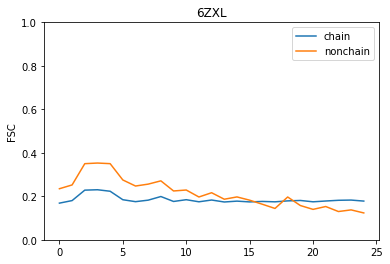

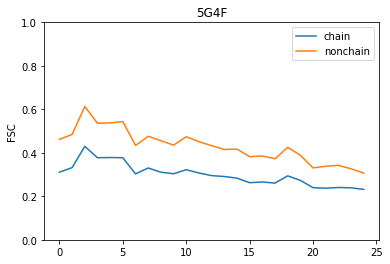

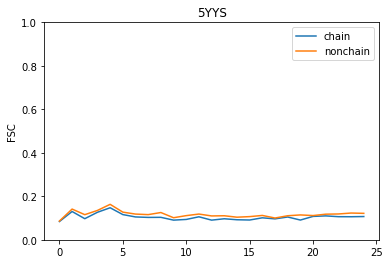

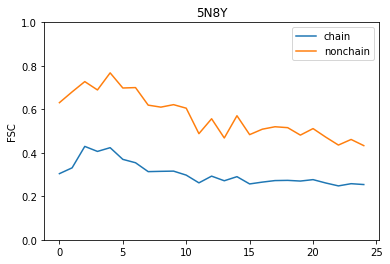

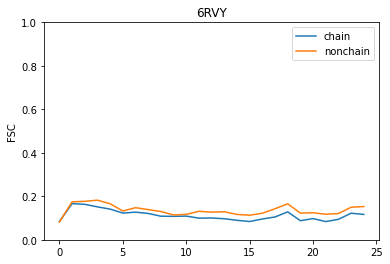

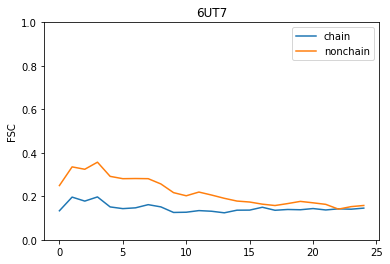

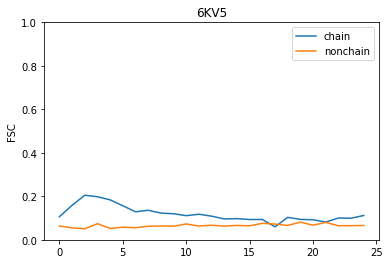

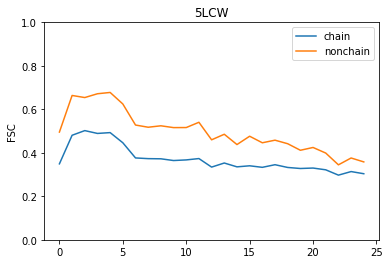

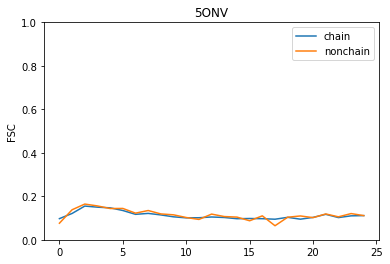

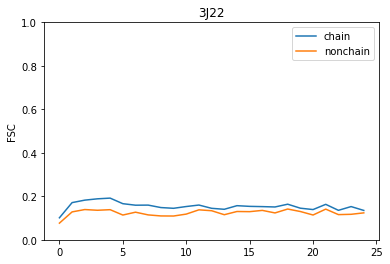

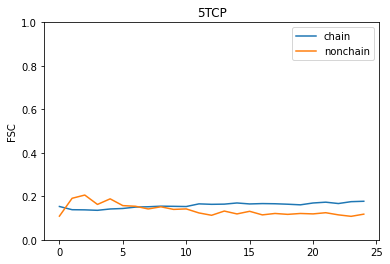

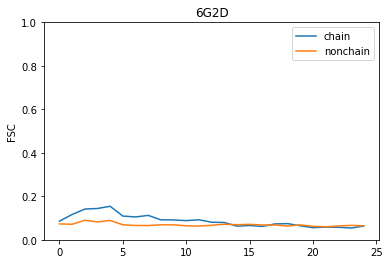

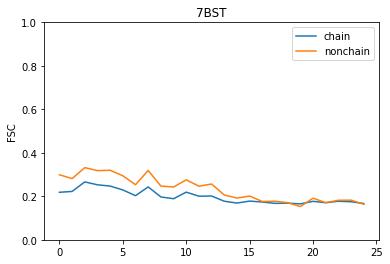

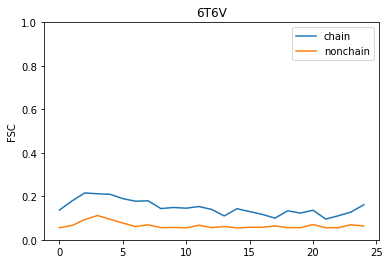

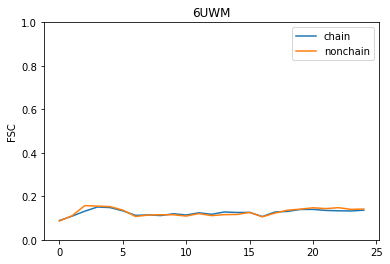

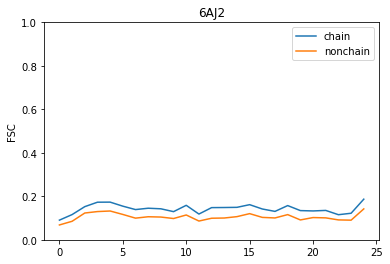

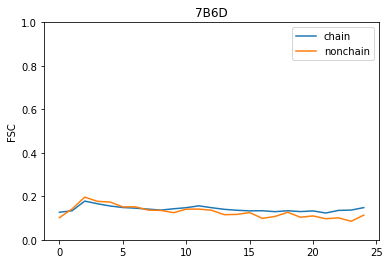

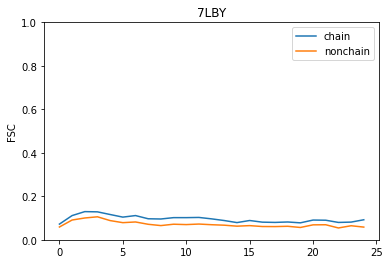

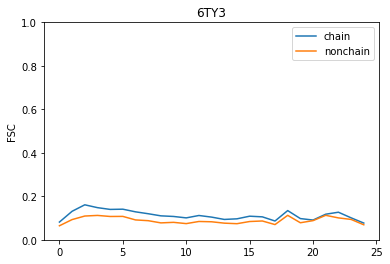

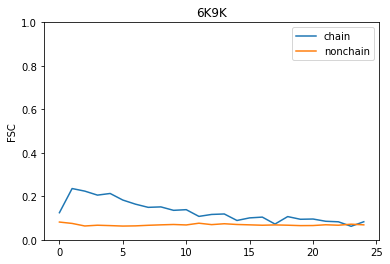

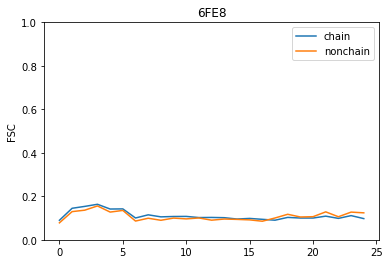

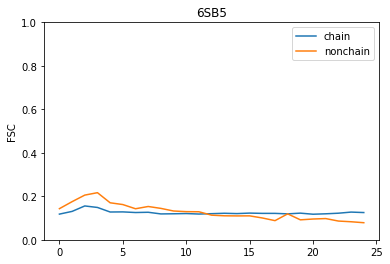

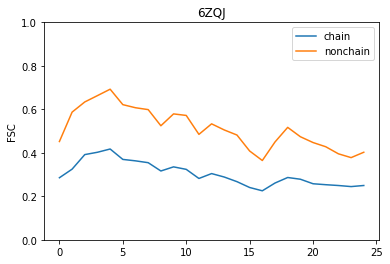

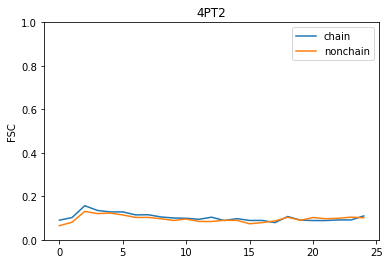

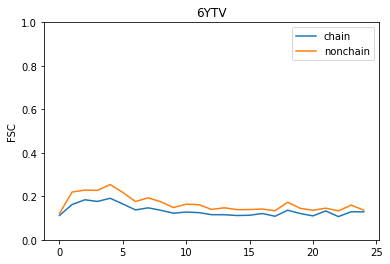

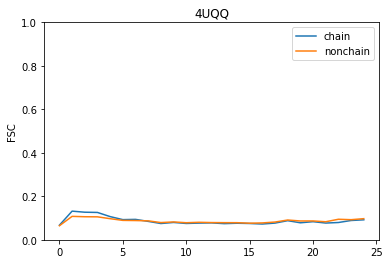

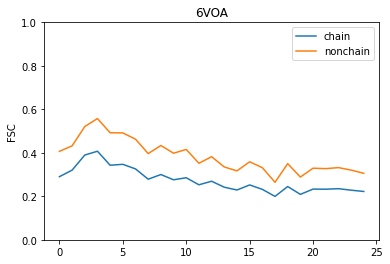

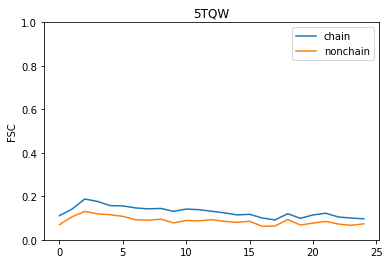

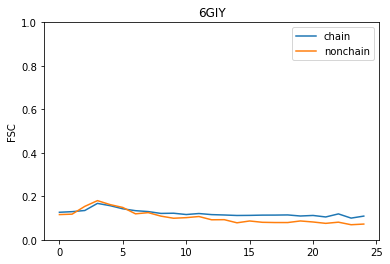

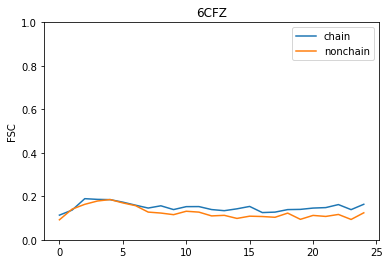

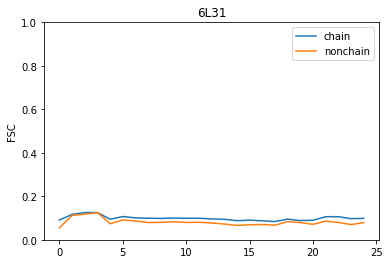

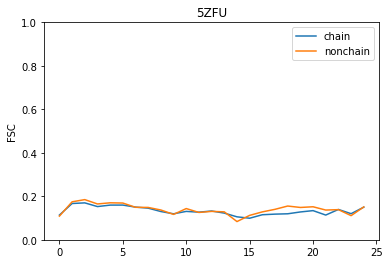

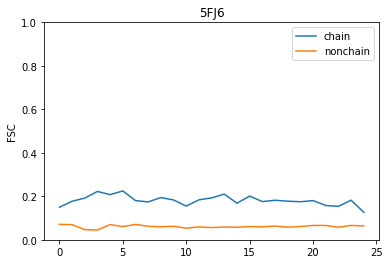

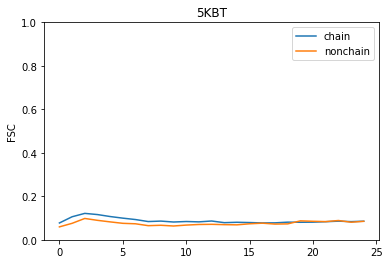

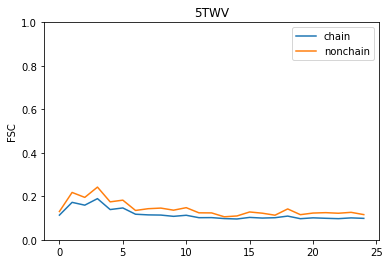

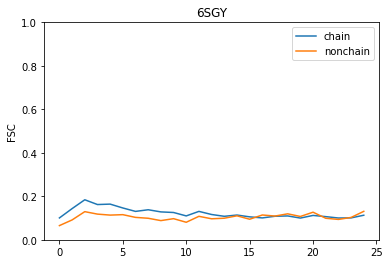

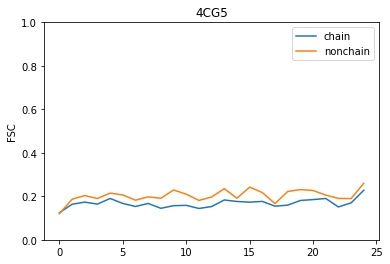

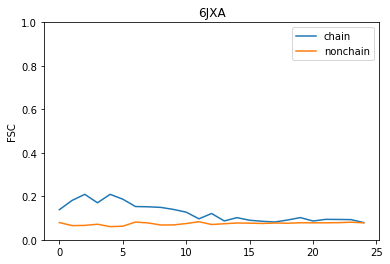

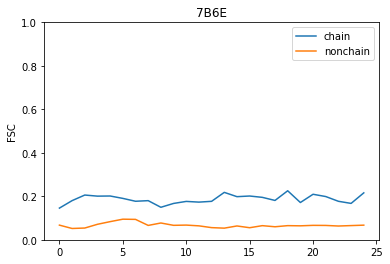

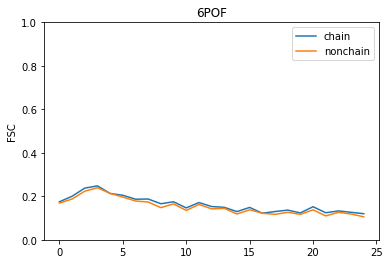

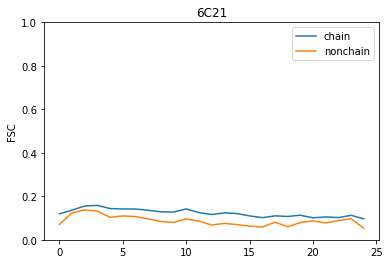

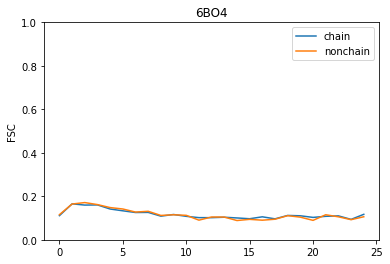

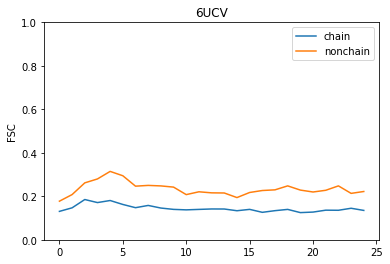

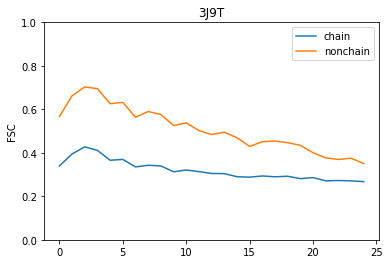

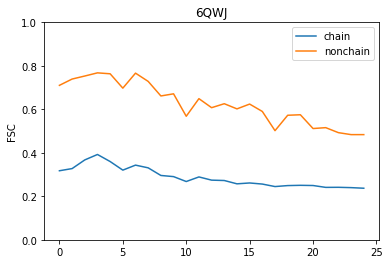

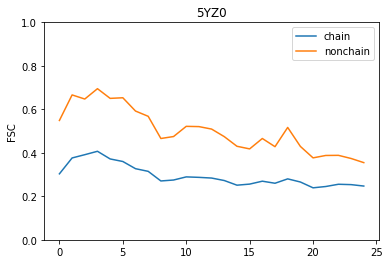

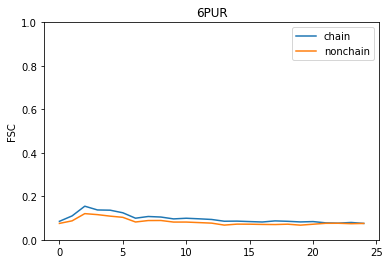

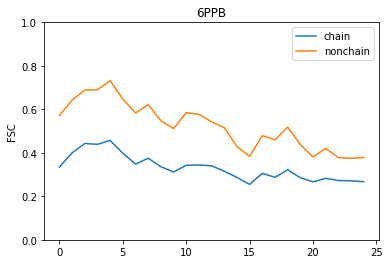

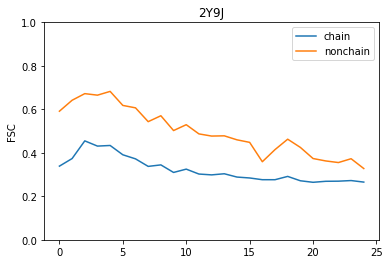

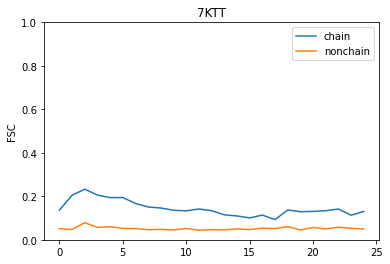

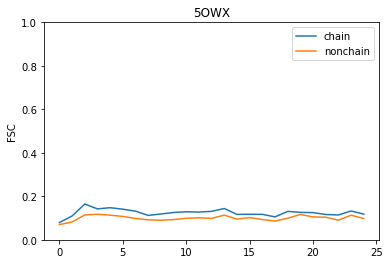

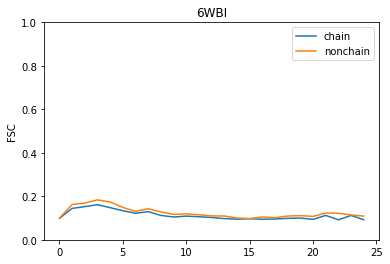

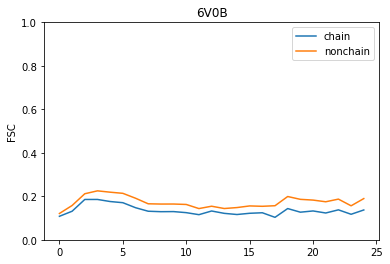

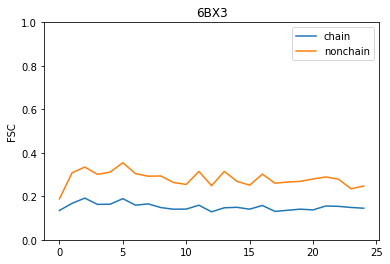

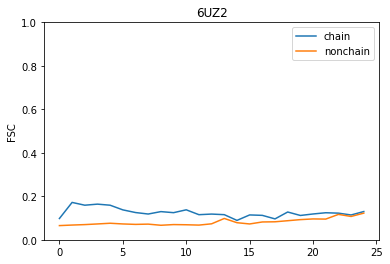

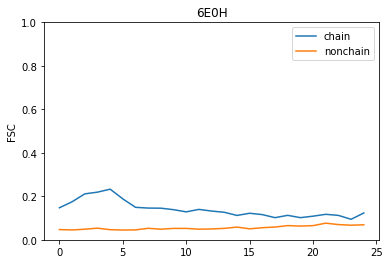

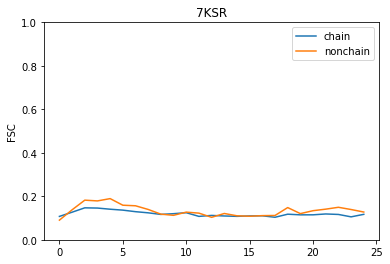

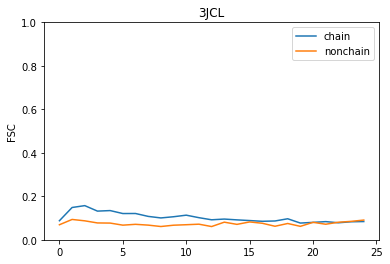

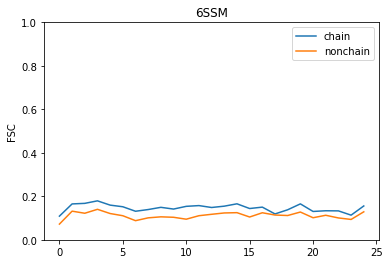

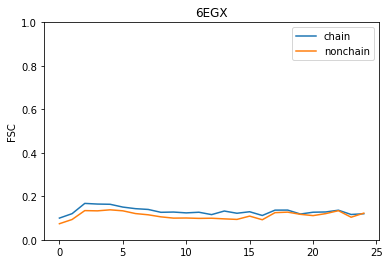

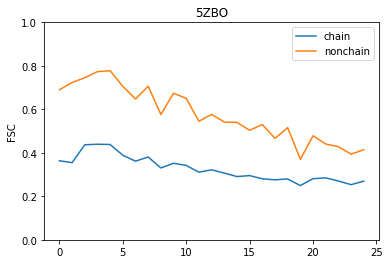

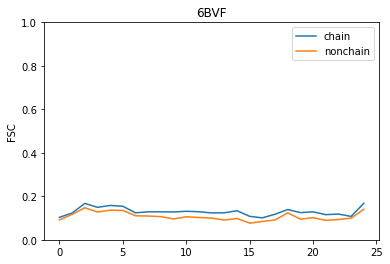

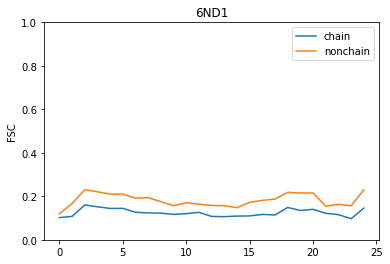

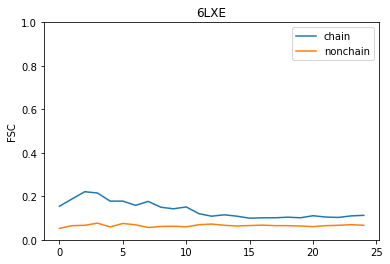

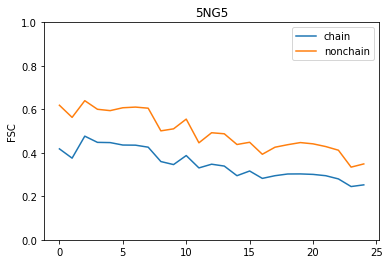

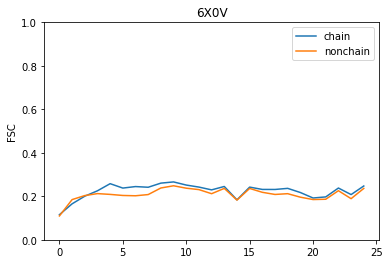

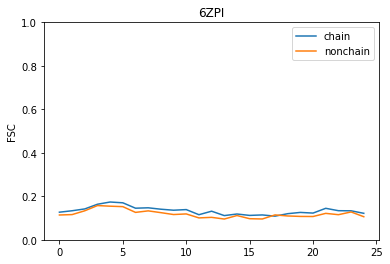

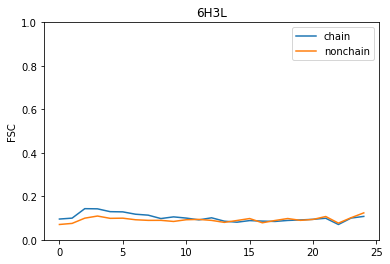

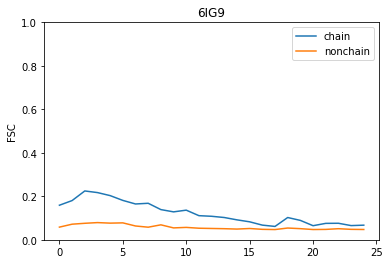

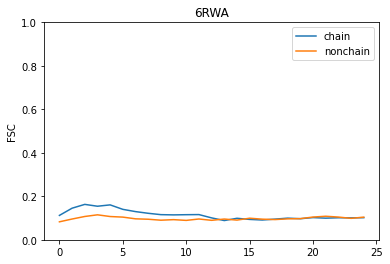

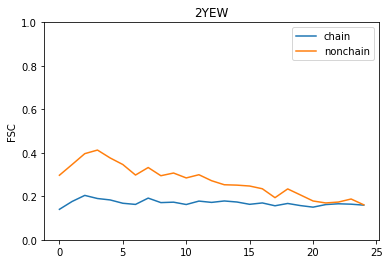

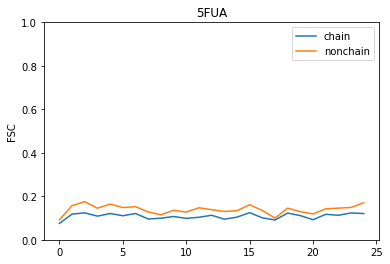

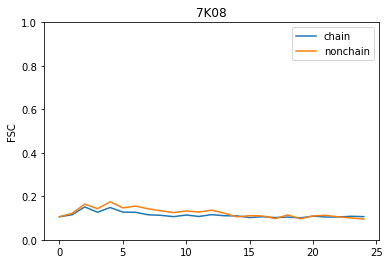

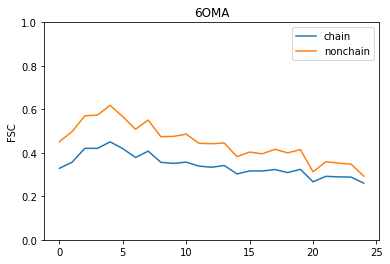

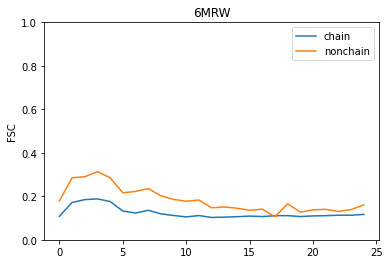

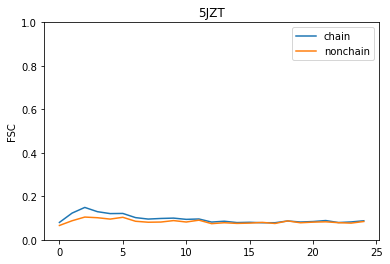

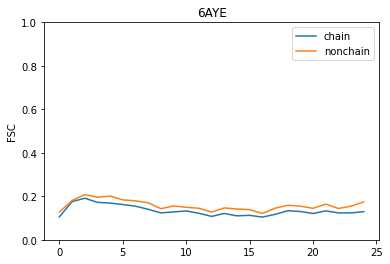

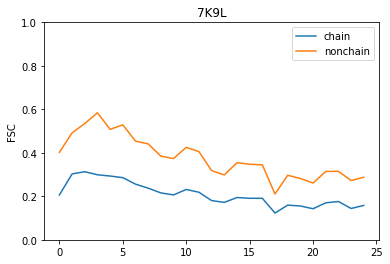

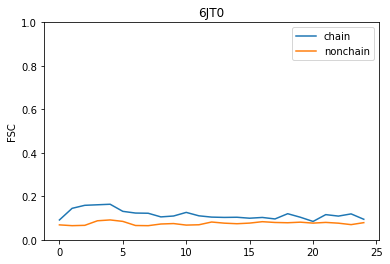

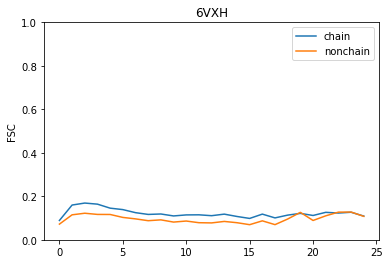

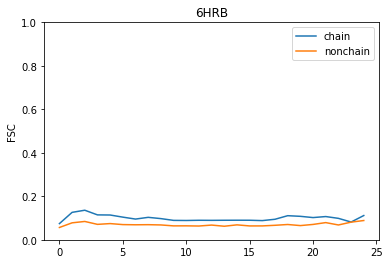

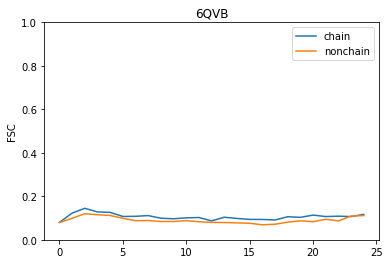

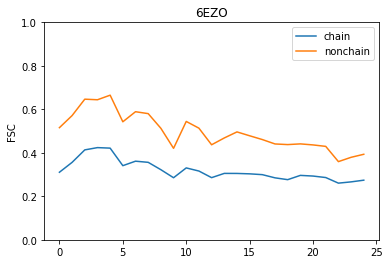

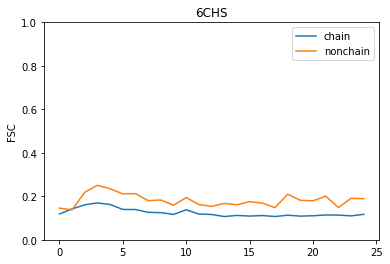

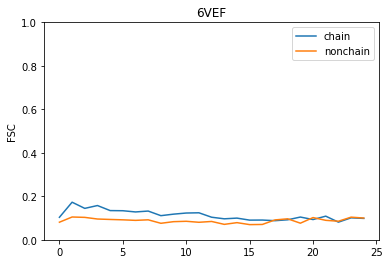

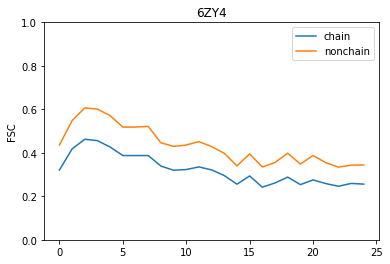

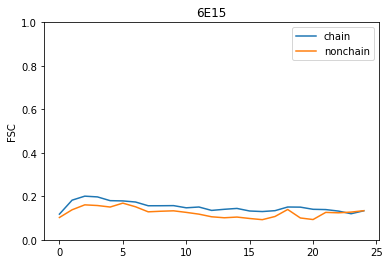

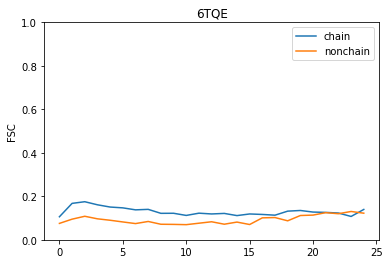

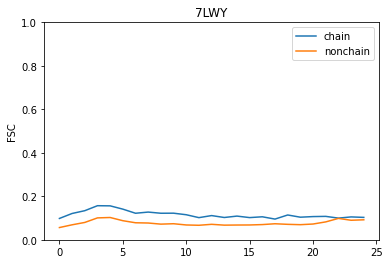

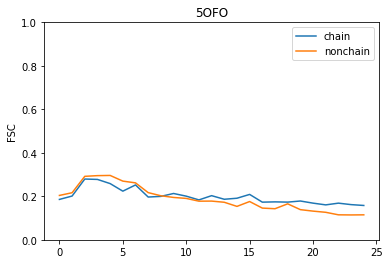

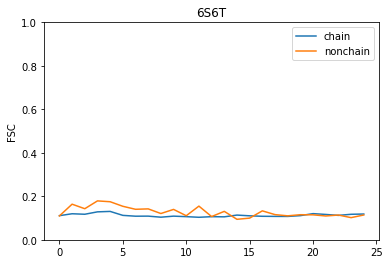

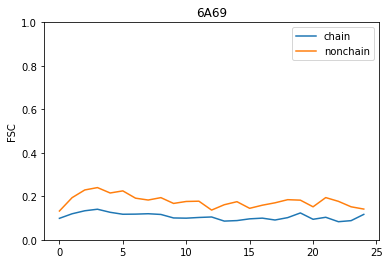

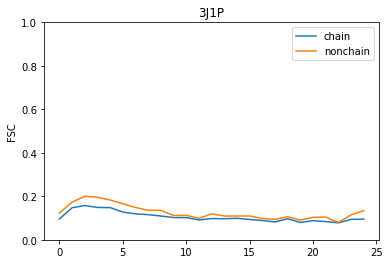

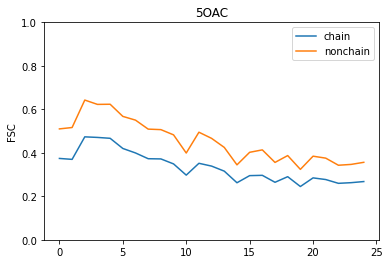

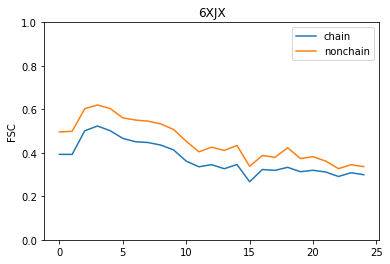

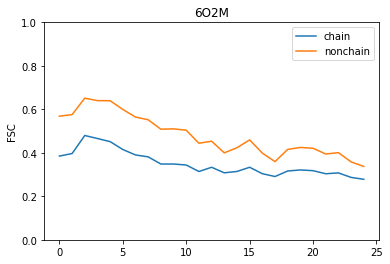

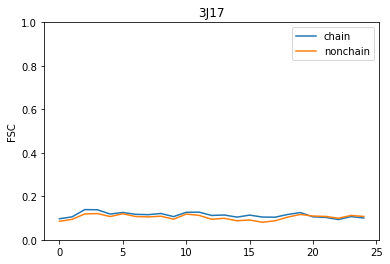

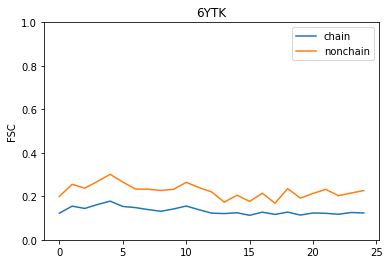

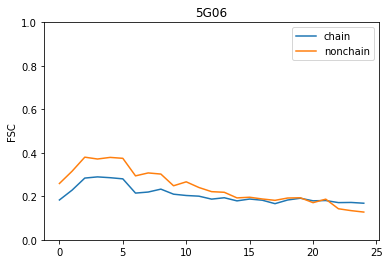

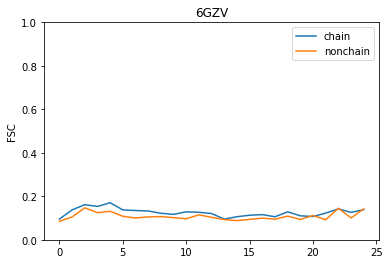

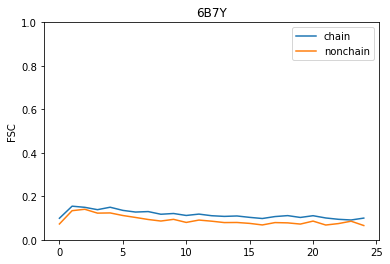

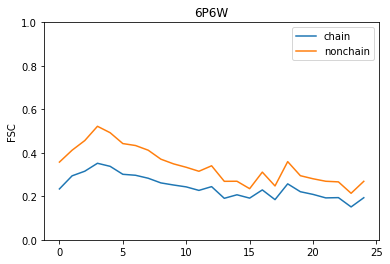

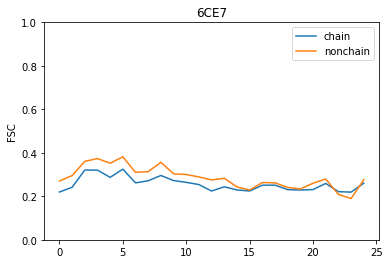

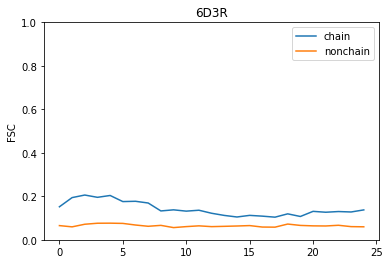

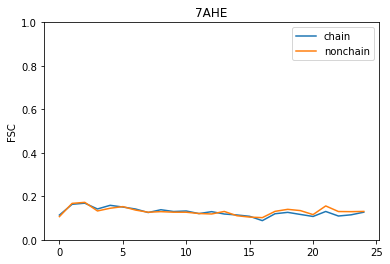

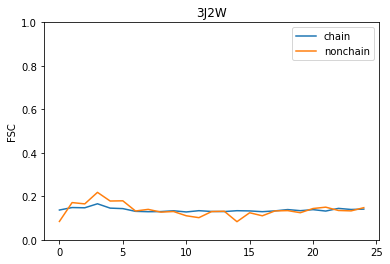

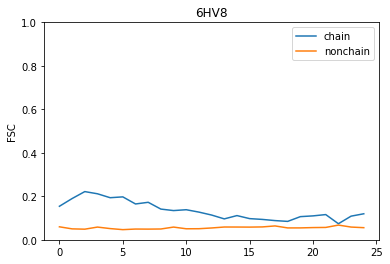

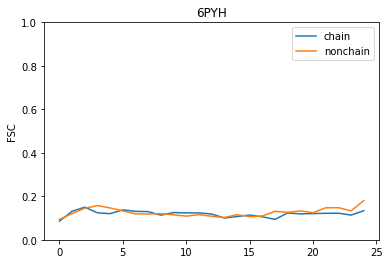

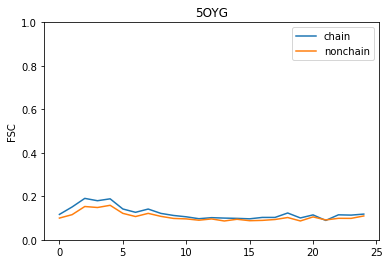

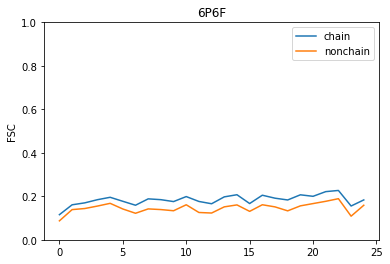

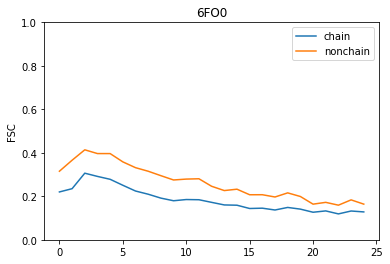

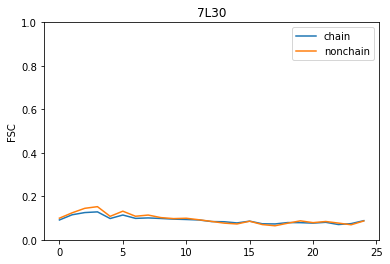

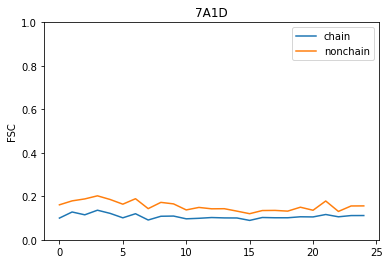

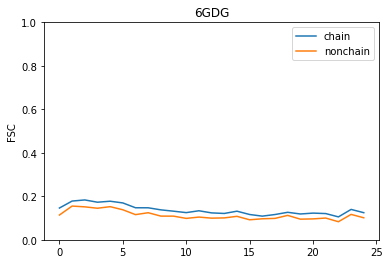

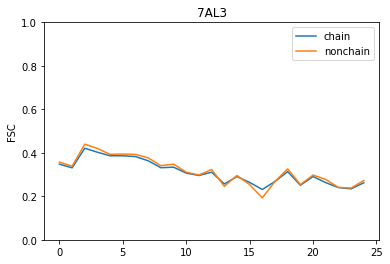

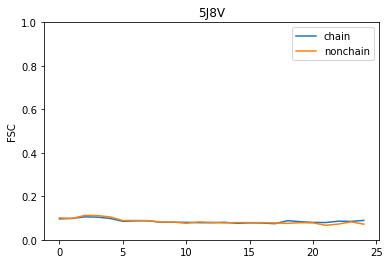

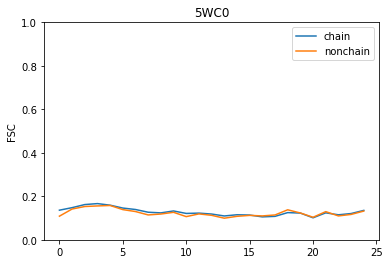

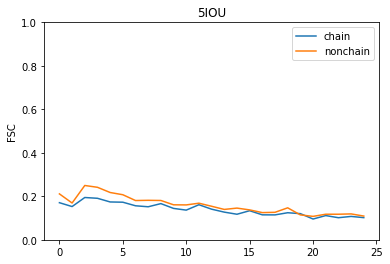

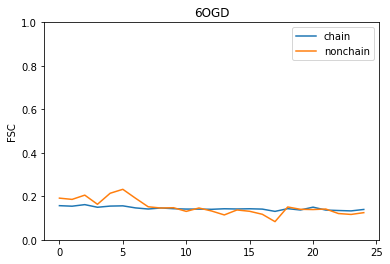

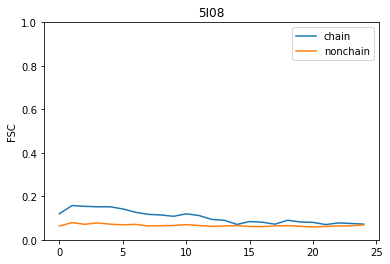

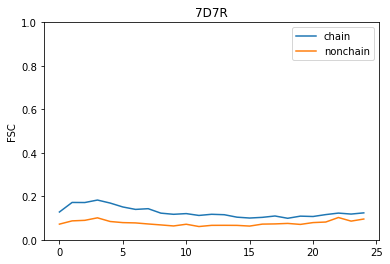

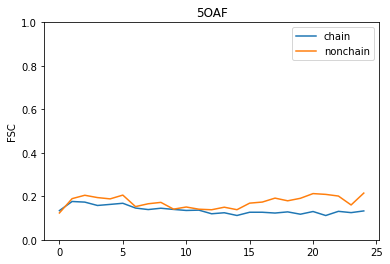

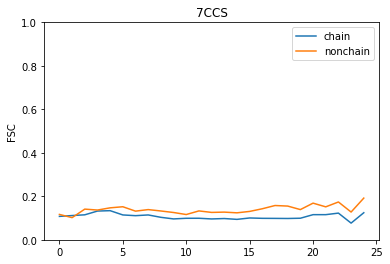

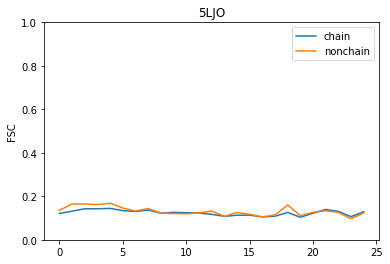

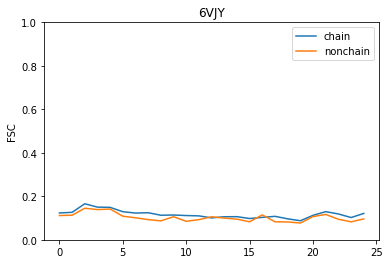

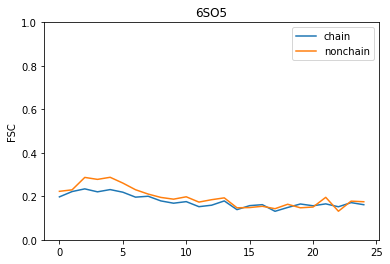

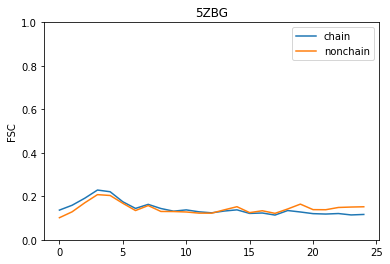

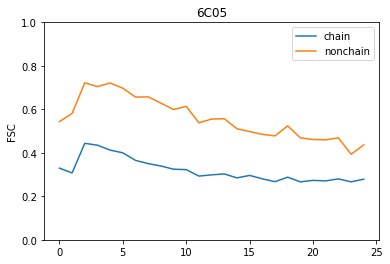

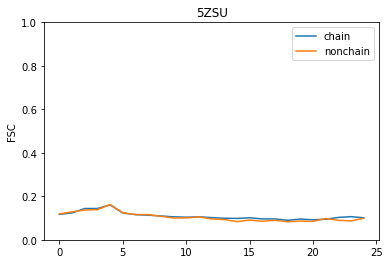

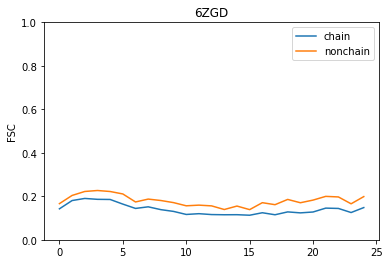

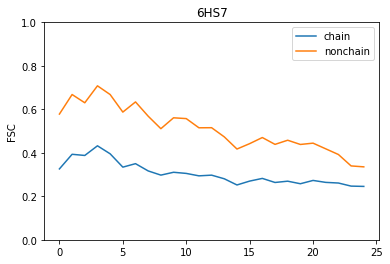

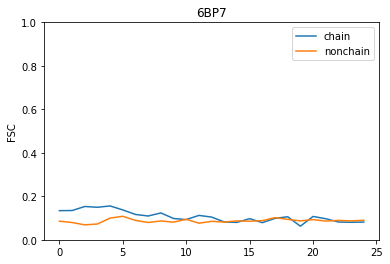

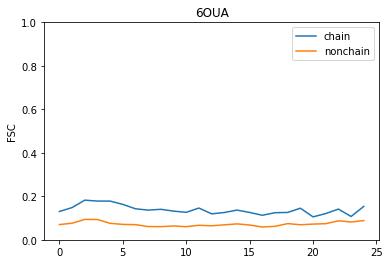

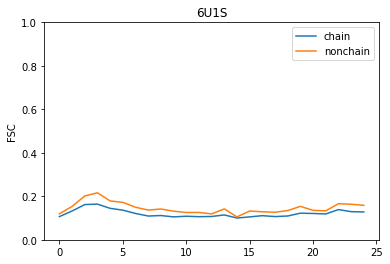

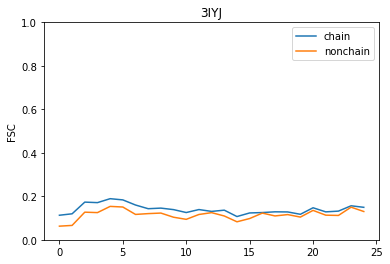

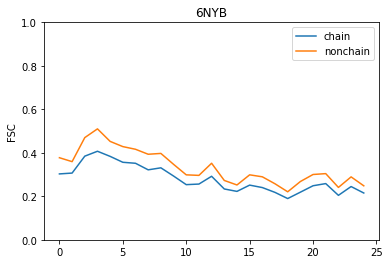

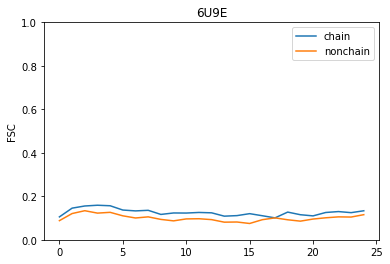

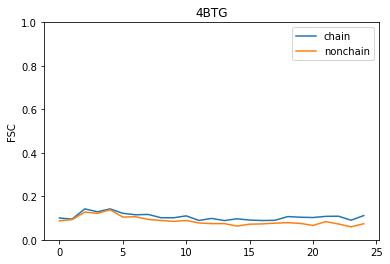

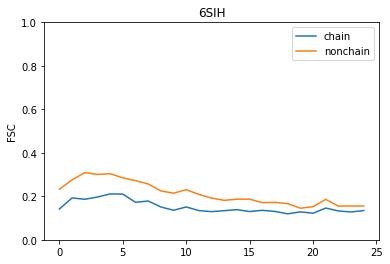

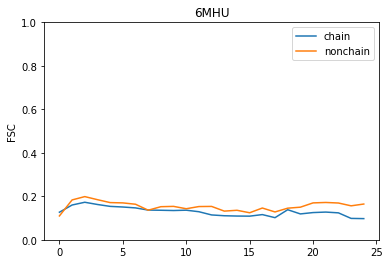

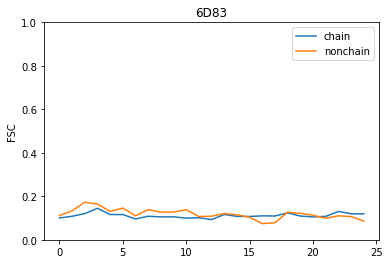

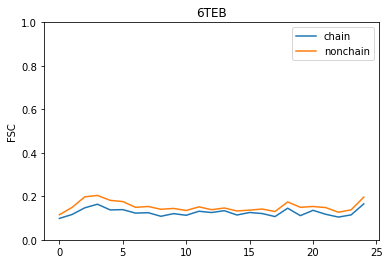

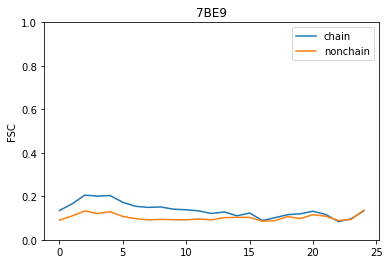

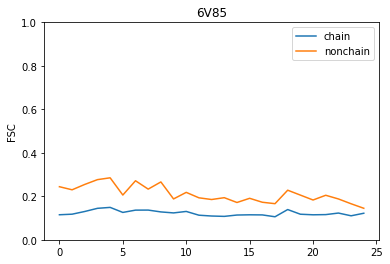

In [35]:
for pdb in fsc_loss_values["box_chain"]:
    plt.plot(1 - np.array(fsc_loss_values["box_chain"][pdb]), label="chain")
    plt.plot(1 - np.array(fsc_loss_values["box_non_chain"][pdb]), label="nonchain")
    plt.legend()
    plt.ylabel("FSC")
    plt.ylim((0,1))
    plt.title(pdb)
    plt.show()

In [25]:
print(names)

['5G06', '6V0B', '7AHE', '6HZ5', '5G4F', '6QXM', '5WRG', '5FUA', '6PYH', '6OGD', '7JW1', '6XE6', '6AJ2', '6RWA', '6BX3', '7LBY', '3JC5', '6JT0', '6V85', '6PW9', '6R7Y', '5N8Y', '5TWV', '6T6V', '5WSN', '6B5B']


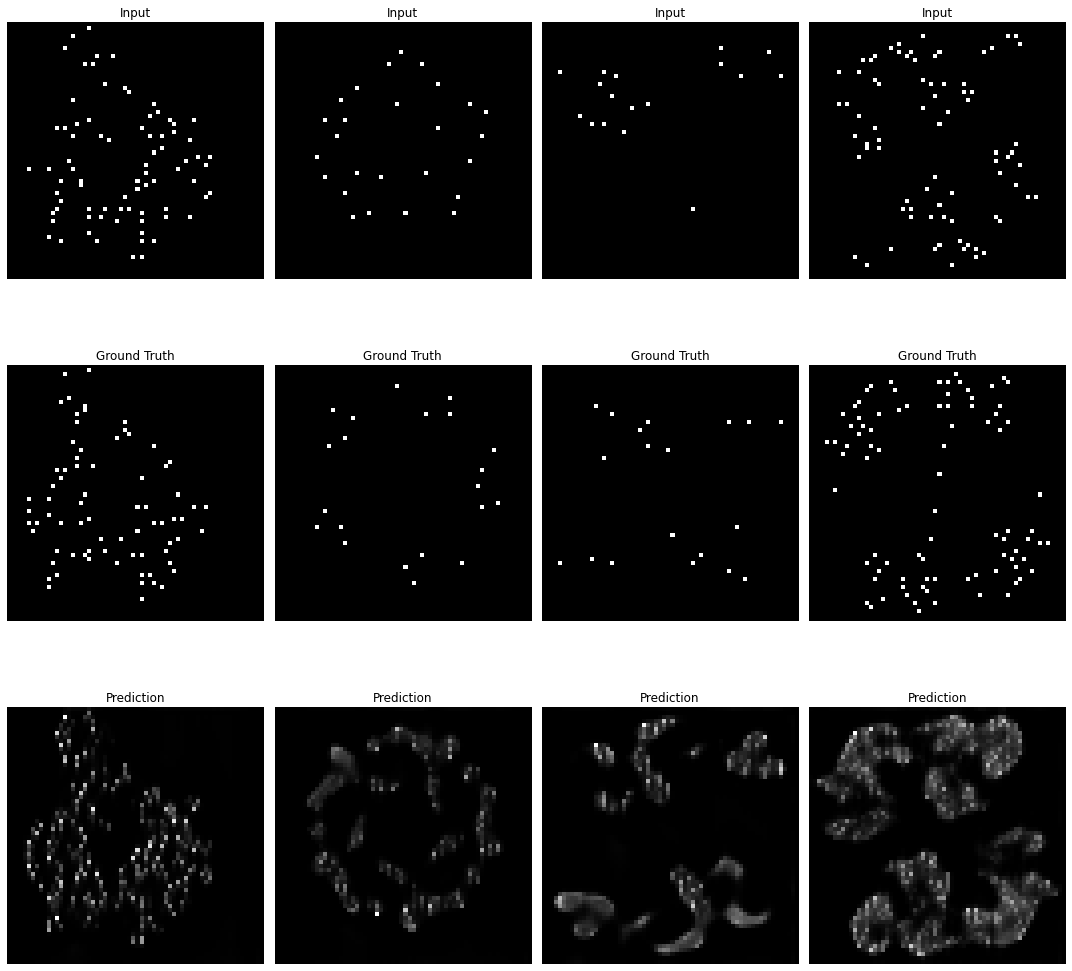

In [20]:
# Visualize the input data, ground truth, and predictions
# Example visualization code (modify as needed)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,15))

for i in range(4):
    axes[0, i].imshow(inputs_array[i, 0, :, :, 32], cmap='gray')  # Show the input slice
    axes[0, i].set_title('Input')
    axes[0, i].axis('off')

    axes[1, i].imshow(ground_truth_array[i, :, :, 32], cmap='gray')  # Show the ground truth slice
    axes[1, i].set_title('Ground Truth')
    axes[1, i].axis('off')

    axes[2, i].imshow(predictions_array[i, 0, :, :, 32], cmap='gray')  # Show the prediction slice
    axes[2, i].set_title('Prediction')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

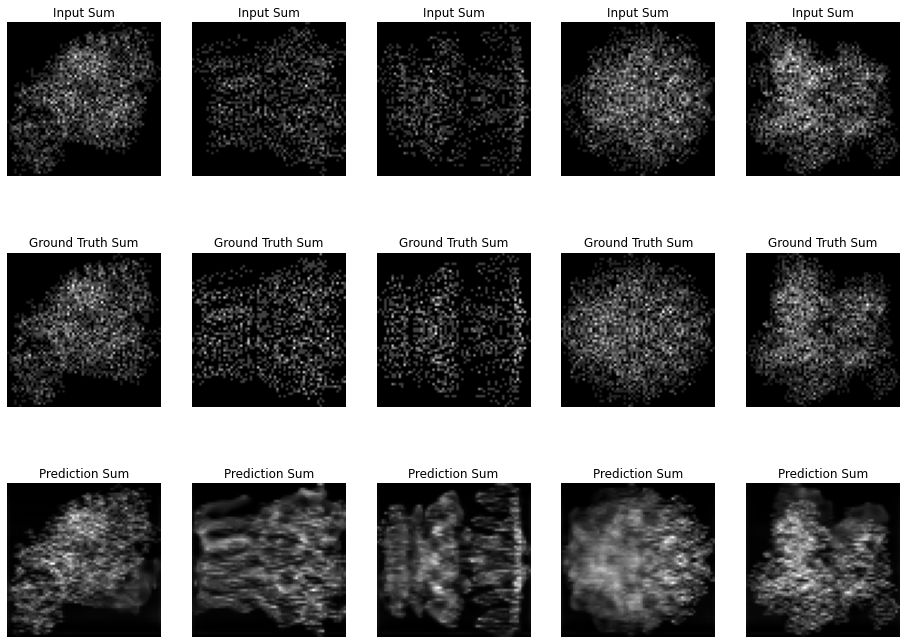

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_slices_with_sum(inputs_array, ground_truth_array, predictions_array, start_layer=0, end_layer=63):
    fig, ax = plt.subplots(3, 5, figsize=(16, 12))

    for i, (input, gt, preds) in enumerate(zip(inputs_array, ground_truth_array, predictions_array)):    
        
        # Perform summation along the depth axis
        input_sum = np.sum(input[0], axis=0)
        true_sum = np.sum(gt, axis=0)
        pred_sum = np.sum(np.sum(preds, axis=0), axis=0)

        # Plot the summed slices
        ax[0, i].imshow(input_sum, cmap='gray')  # Select a slice along the depth axis
        ax[0, i].set_title('Input Sum')
        ax[0, i].axis('off')

        ax[1, i].imshow(true_sum, cmap='gray')  # Select a slice along the depth axis
        ax[1, i].set_title('Ground Truth Sum')
        ax[1, i].axis('off')

        ax[2, i].imshow(pred_sum, cmap='gray')  # Select a slice along the depth axis
        ax[2, i].set_title('Prediction Sum')
        ax[2, i].axis('off')
   
        if i == 4:
            break

    plt.show()
    
# Example usage
plot_slices_with_sum(inputs_array, ground_truth_array, predictions_array)


In [20]:
### Overfit?

In [21]:
### Check the training dataset predictions

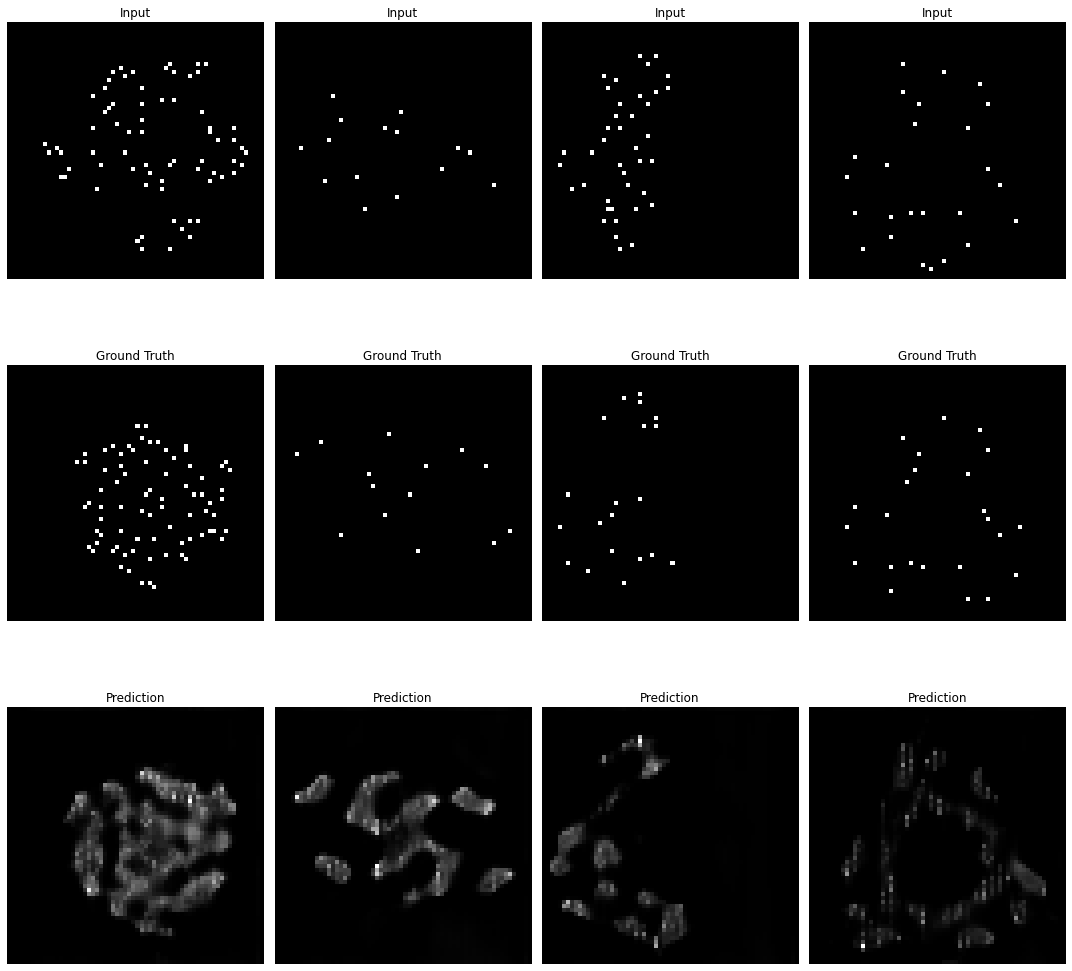

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Initialize lists to store inputs, ground truth, and predictions
inputs_list_train = []
predictions_list_train = []
ground_truth_list_train = []

# Iterate over the test data
with torch.no_grad():
    for i, batch in enumerate(train_loader):
        homolog_ca = batch['homolog_ca'].to(device)
        true_vol = batch['true_vol'].to(device)
        true_ca = batch['true_ca'].to(device)

        inputs_train = torch.stack((homolog_ca, true_vol), dim=1)
        
        # Forward pass
        outputs_train = model(inputs_train)

        # Append inputs, ground truth, and predictions to the lists
        inputs_list_train.append(inputs_train.cpu().numpy())
        predictions_list_train.append(outputs_train.cpu().numpy())
        ground_truth_list_train.append(true_ca.cpu().numpy())

        if i == 10:
            break
            
# Convert lists to NumPy arrays
inputs_array_train = np.concatenate(inputs_list_train, axis=0)
predictions_array_train = np.concatenate(predictions_list_train, axis=0)
ground_truth_array_train = np.concatenate(ground_truth_list_train, axis=0)

# Visualize the input data, ground truth, and predictions
# Example visualization code (modify as needed)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,15))

for i in range(4):
    axes[0, i].imshow(inputs_array_train[i, 0, :, :, 32], cmap='gray')  # Show the input slice
    axes[0, i].set_title('Input')
    axes[0, i].axis('off')

    axes[1, i].imshow(ground_truth_array_train[i, :, :, 32], cmap='gray')  # Show the ground truth slice
    axes[1, i].set_title('Ground Truth')
    axes[1, i].axis('off')

    axes[2, i].imshow(predictions_array_train[i, 0, :, :, 32], cmap='gray')  # Show the prediction slice
    axes[2, i].set_title('Prediction')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()


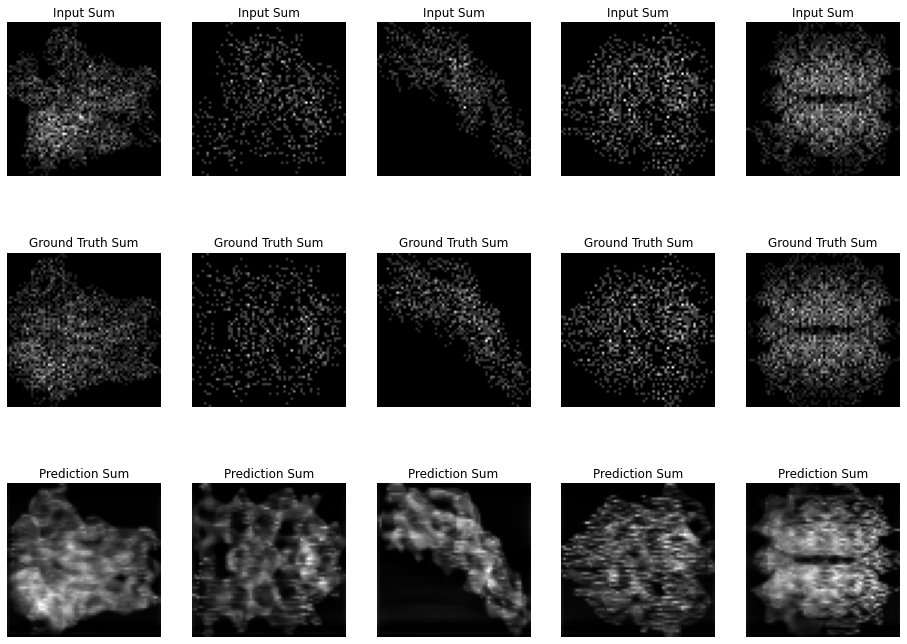

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_slices_with_sum(inputs_array, ground_truth_array, predictions_array, start_layer=0, end_layer=63):
    fig, ax = plt.subplots(3, 5, figsize=(16, 12))

    for i, (input, gt, preds) in enumerate(zip(inputs_array, ground_truth_array, predictions_array)):    
        
        # Perform summation along the depth axis
        input_sum = np.sum(input[0], axis=0)
        true_sum = np.sum(gt, axis=0)
        pred_sum = np.sum(np.sum(preds, axis=0), axis=0)

        # Plot the summed slices
        ax[0, i].imshow(input_sum, cmap='gray')  # Select a slice along the depth axis
        ax[0, i].set_title('Input Sum')
        ax[0, i].axis('off')

        ax[1, i].imshow(true_sum, cmap='gray')  # Select a slice along the depth axis
        ax[1, i].set_title('Ground Truth Sum')
        ax[1, i].axis('off')

        ax[2, i].imshow(pred_sum, cmap='gray')  # Select a slice along the depth axis
        ax[2, i].set_title('Prediction Sum')
        ax[2, i].axis('off')
   
        if i == 4:
            break

    plt.show()
    
# Example usage
plot_slices_with_sum(inputs_array_train, ground_truth_array_train, predictions_array_train)
